___

<p style="text-align: center;"><img src="https://image.slidesharecdn.com/creditcardfrauddetection-140719133724-phpapp01/85/credit-card-fraud-detection-1-320.jpg?cb=1665817055" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from collections import Counter

import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import iplot
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio
import plotly.graph_objs as go
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, average_precision_score, plot_roc_curve, plot_precision_recall_curve

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import PrecisionRecallCurve, ClassPredictionError
from sklearn.neighbors import KNeighborsClassifier, BallTree
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import pickle
from tensorflow.keras.models import load_model

#pip install deepchecks
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity
from deepchecks.tabular.suites import train_test_validation
from deepchecks.tabular.suites import model_evaluation


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [94]:
df = pd.read_csv("creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [96]:
df.shape

(284807, 31)

In [97]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [98]:
label_name = 'Class'

In [99]:
df_train, df_test = train_test_split(df, stratify=df[label_name], random_state=42)

In [100]:
train_ds = Dataset(df_train, label=label_name, cat_features=[])
test_ds = Dataset(df_test, label=label_name, cat_features=[])

In [101]:
result_train = data_integrity().run(train_ds)
result_train

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_XRZT0TCFLA9URAUKHYK6CJLMU">Data Integrity Sui…

In [102]:
result_test = data_integrity().run(test_ds)
result_test

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_94E7YUSUNQUQ518GVJJTUKH1L">Data Integrity Sui…

### Exploratory Data Analysis

In [103]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

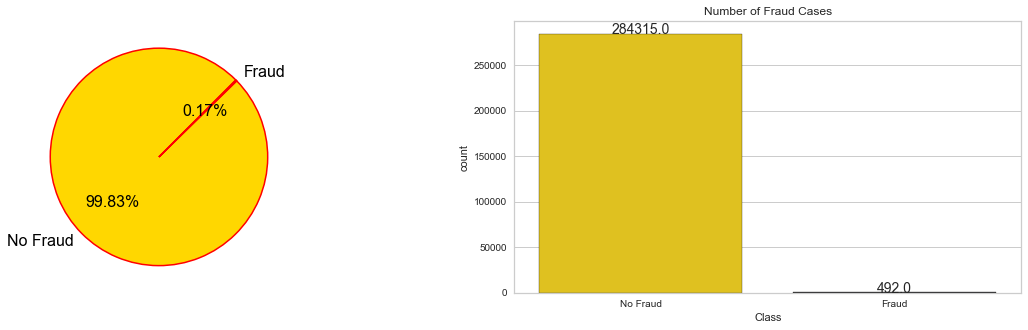

In [104]:
fraud = len(df[df['Class'] == 1]) / len(df) * 100
nofraud = len(df[df['Class'] == 0]) / len(df) * 100
fraud_percentage = [nofraud,fraud]

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['No Fraud','Fraud'],autopct='%.2f%%',startangle = 45,colors = colors,
       wedgeprops = {'edgecolor' : 'red','linewidth': 1.5,'antialiased' : True}, textprops={'color':'black','fontsize': 16})

plt.subplot(1,2,2)
ax = sns.countplot(x='Class', data=df, edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 14)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

In [105]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [106]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [107]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tmp = pd.DataFrame(tmp)
df_tmp.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_tmp.head()

Hour  Class   Min      Max  Transactions        Sum        Mean   Median  \
0   0.0      0   0.0  7712.43          3961  256572.87   64.774772   12.990   
1   0.0      1   0.0   529.00             2     529.00  264.500000  264.500   
2   1.0      0   0.0  1769.69          2215  145806.76   65.826980   22.820   
3   1.0      1  59.0   239.93             2     298.93  149.465000  149.465   
4   2.0      0   0.0  4002.88          1555  106989.39   68.803466   17.900   

             Var  
0   45615.821201  
1  139920.500000  
2   20053.615770  
3   16367.832450  
4   45355.430437

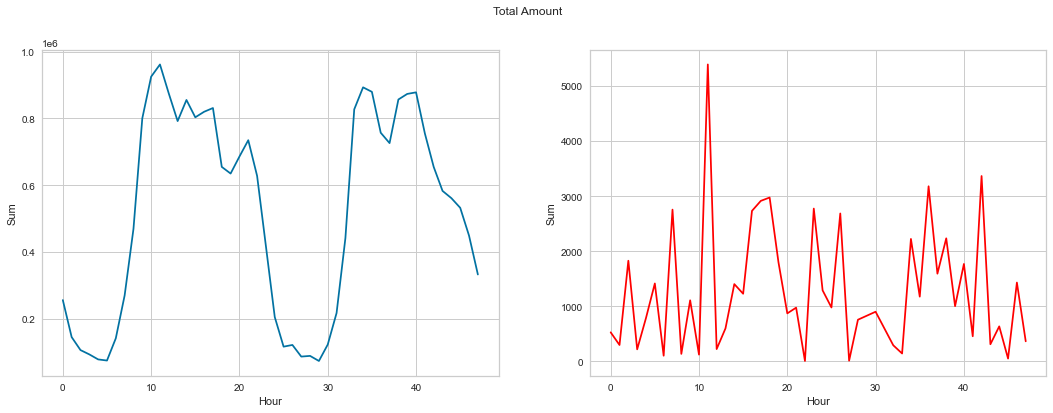

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df_tmp.loc[df_tmp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

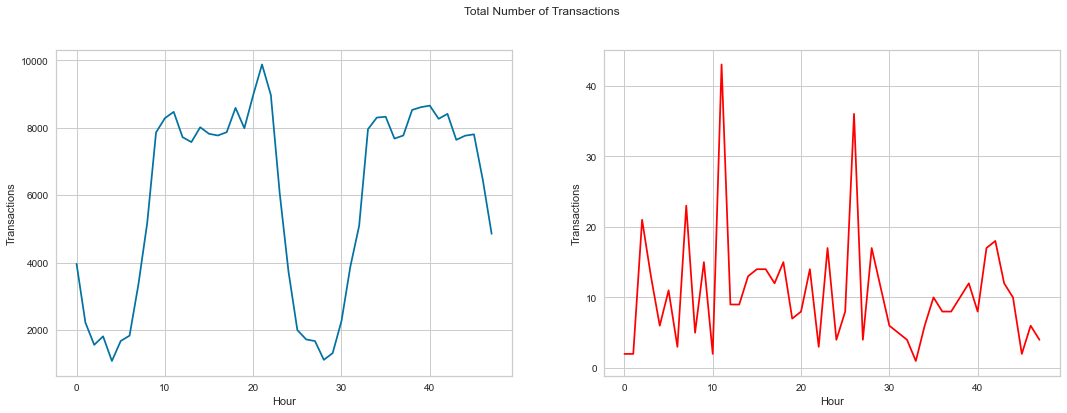

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df_tmp.loc[df_tmp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

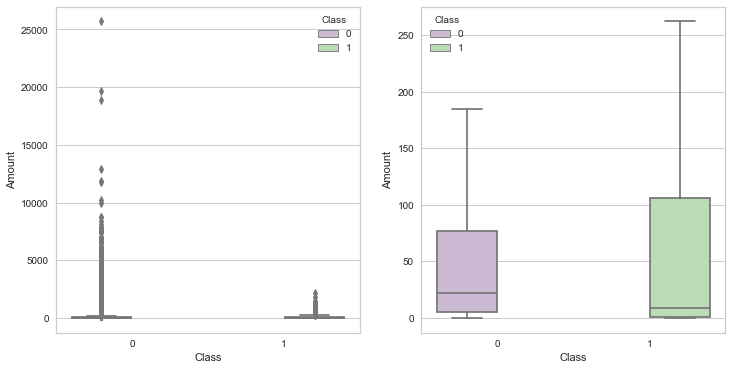

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [111]:
df[['Amount','Class']].loc[df['Class'] == 0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [112]:
df[['Amount','Class']].loc[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [113]:
fraud = df.loc[df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='purple',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

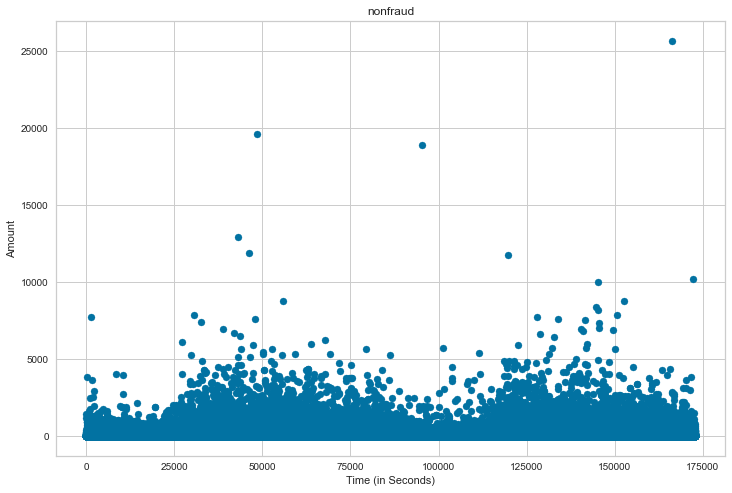

In [114]:
plt.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
plt.title('nonfraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

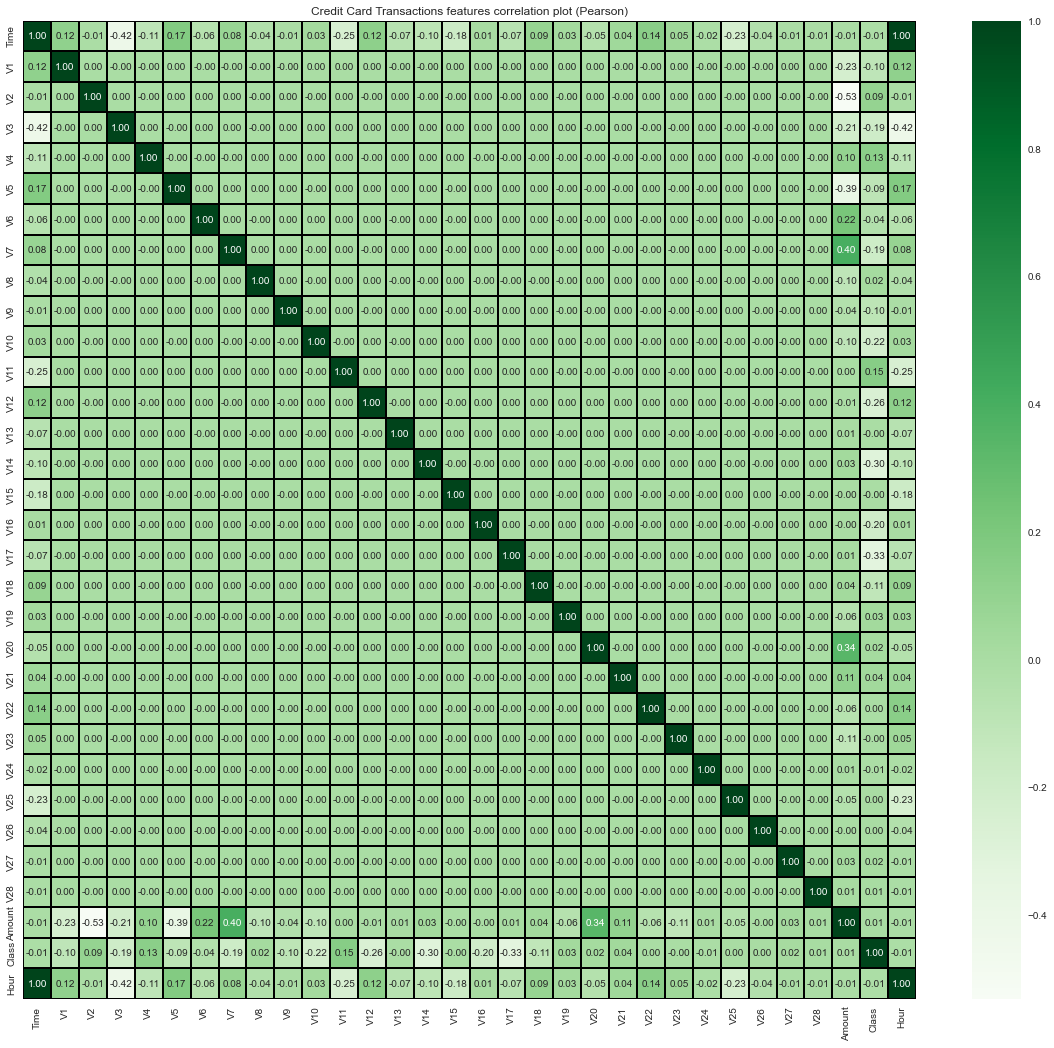

In [115]:
plt.figure(figsize = (20,18))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens",linecolor='black',fmt='.2f', annot=True)
plt.show()

Comment with Corr Table: As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V2 and V5).

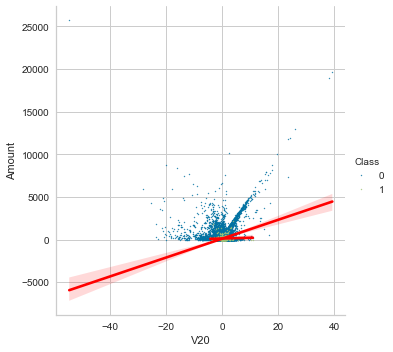

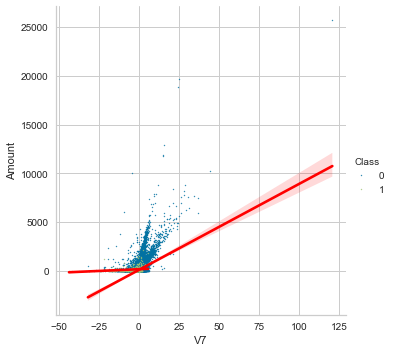

In [116]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True, scatter_kws={'s':2}, line_kws={'color': 'red'})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True, scatter_kws={'s':2}, line_kws={'color': 'red'})
plt.show()

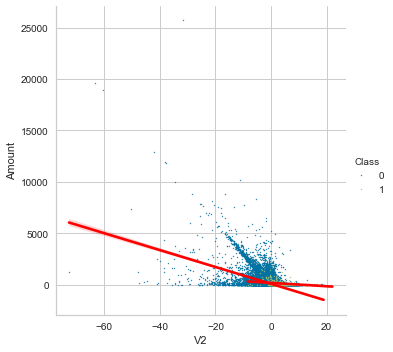

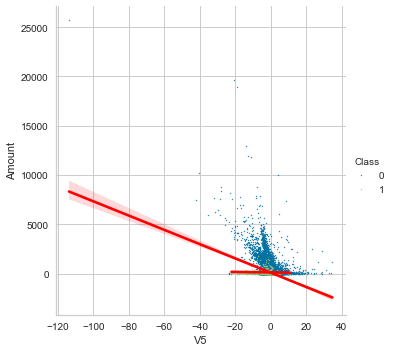

In [117]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True, scatter_kws={'s':2}, line_kws={'color': 'red'})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True, scatter_kws={'s':2}, line_kws={'color': 'red'})
plt.show()

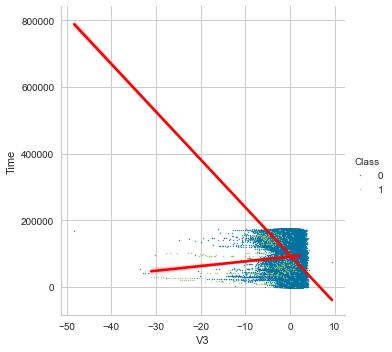

In [118]:
s = sns.lmplot(x='V3', y='Time',data=df, hue='Class', fit_reg=True, scatter_kws={'s':2}, line_kws={'color': 'red'})
plt.show()

<Figure size 864x576 with 0 Axes>

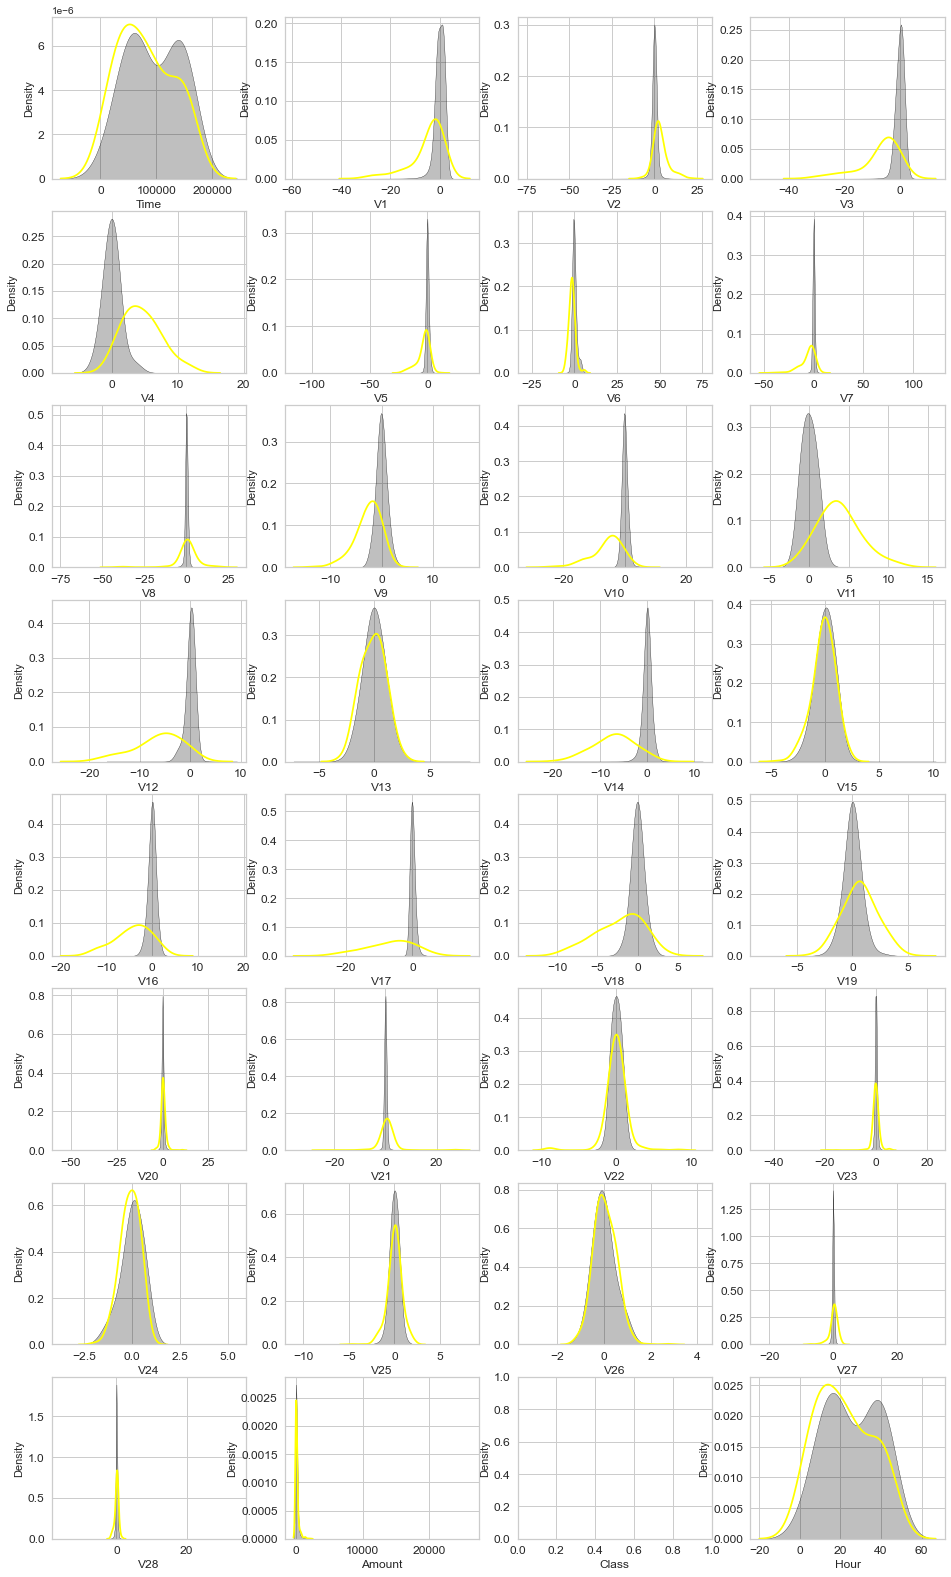

In [119]:
val = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in val:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0", shade=True, color='black')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1", color='yellow')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

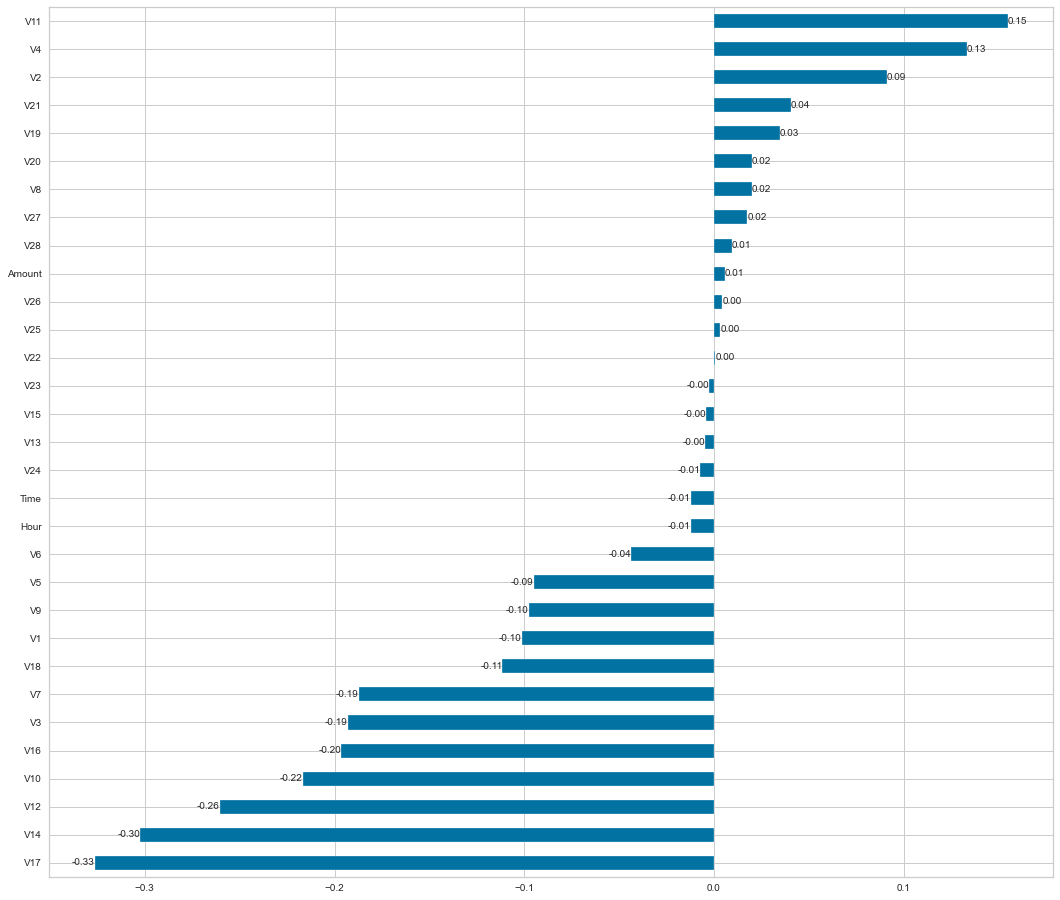

In [120]:
plt.figure(figsize=(18,16))
ax = df.corr()["Class"].drop("Class").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

In [121]:
matrix = df.drop("Hour", axis=1).corr()
matrix = matrix.unstack()
matrix = matrix[(abs(matrix) >= 0.1) & (abs(matrix) < 1)]

In [122]:
matrix.unstack()["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V4        0.133447
V11       0.154876
Time           NaN
V2             NaN
V5             NaN
V6             NaN
V8             NaN
V15            NaN
V20            NaN
V21            NaN
V22            NaN
V23            NaN
V25            NaN
Amount         NaN
Class          NaN
Name: Class, dtype: float64

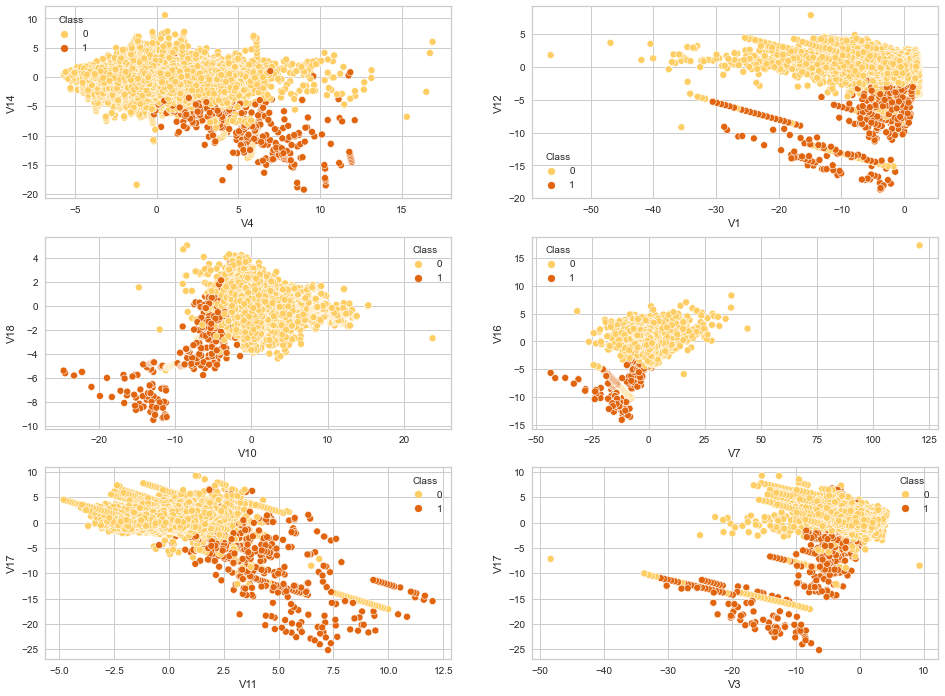

In [123]:
fig, ax = plt.subplots(3,2, figsize=(16,12))

sns.scatterplot(x=df.V4,y=df.V14, hue=df.Class, ax=ax[0,0], palette="YlOrBr")

sns.scatterplot(x=df.V1,y=df.V12, hue=df.Class, ax=ax[0,1], palette="YlOrBr")

sns.scatterplot(x=df.V10,y=df.V18, hue=df.Class, ax=ax[1,0], palette="YlOrBr")

sns.scatterplot(x=df.V7,y=df.V16, hue=df.Class, ax=ax[1,1], palette="YlOrBr")

sns.scatterplot(x=df.V11,y=df.V17, hue=df.Class, ax=ax[2,0], palette="YlOrBr")

sns.scatterplot(x=df.V3,y=df.V17, hue=df.Class, ax=ax[2,1], palette="YlOrBr");

### Data Cleaning
Check Missing Values and Outliers

In [124]:
print('Missing Value   : ', df.isna().sum().sum())

Missing Value   :  0


In [125]:
print('Duplicated Rows : ', df.duplicated().sum())

Duplicated Rows :  1081


In [126]:
print('NoFraud Duplicated Rows : ', df[df["Class"] == 0].duplicated().sum())

NoFraud Duplicated Rows :  1062


In [127]:
print('Fraud Duplicated Rows : ', df[df["Class"] == 1].duplicated().sum())

Fraud Duplicated Rows :  19


In [128]:
# Only Class = 0 duplicated values dropping. Because We need Class = 1 values.

NoFraud_dup_index = df[(df["Class"] == 0) & (df.duplicated(keep='first'))].index
df.drop(index=NoFraud_dup_index, inplace=True)

In [129]:
df.Class.value_counts()

0    283253
1       492
Name: Class, dtype: int64

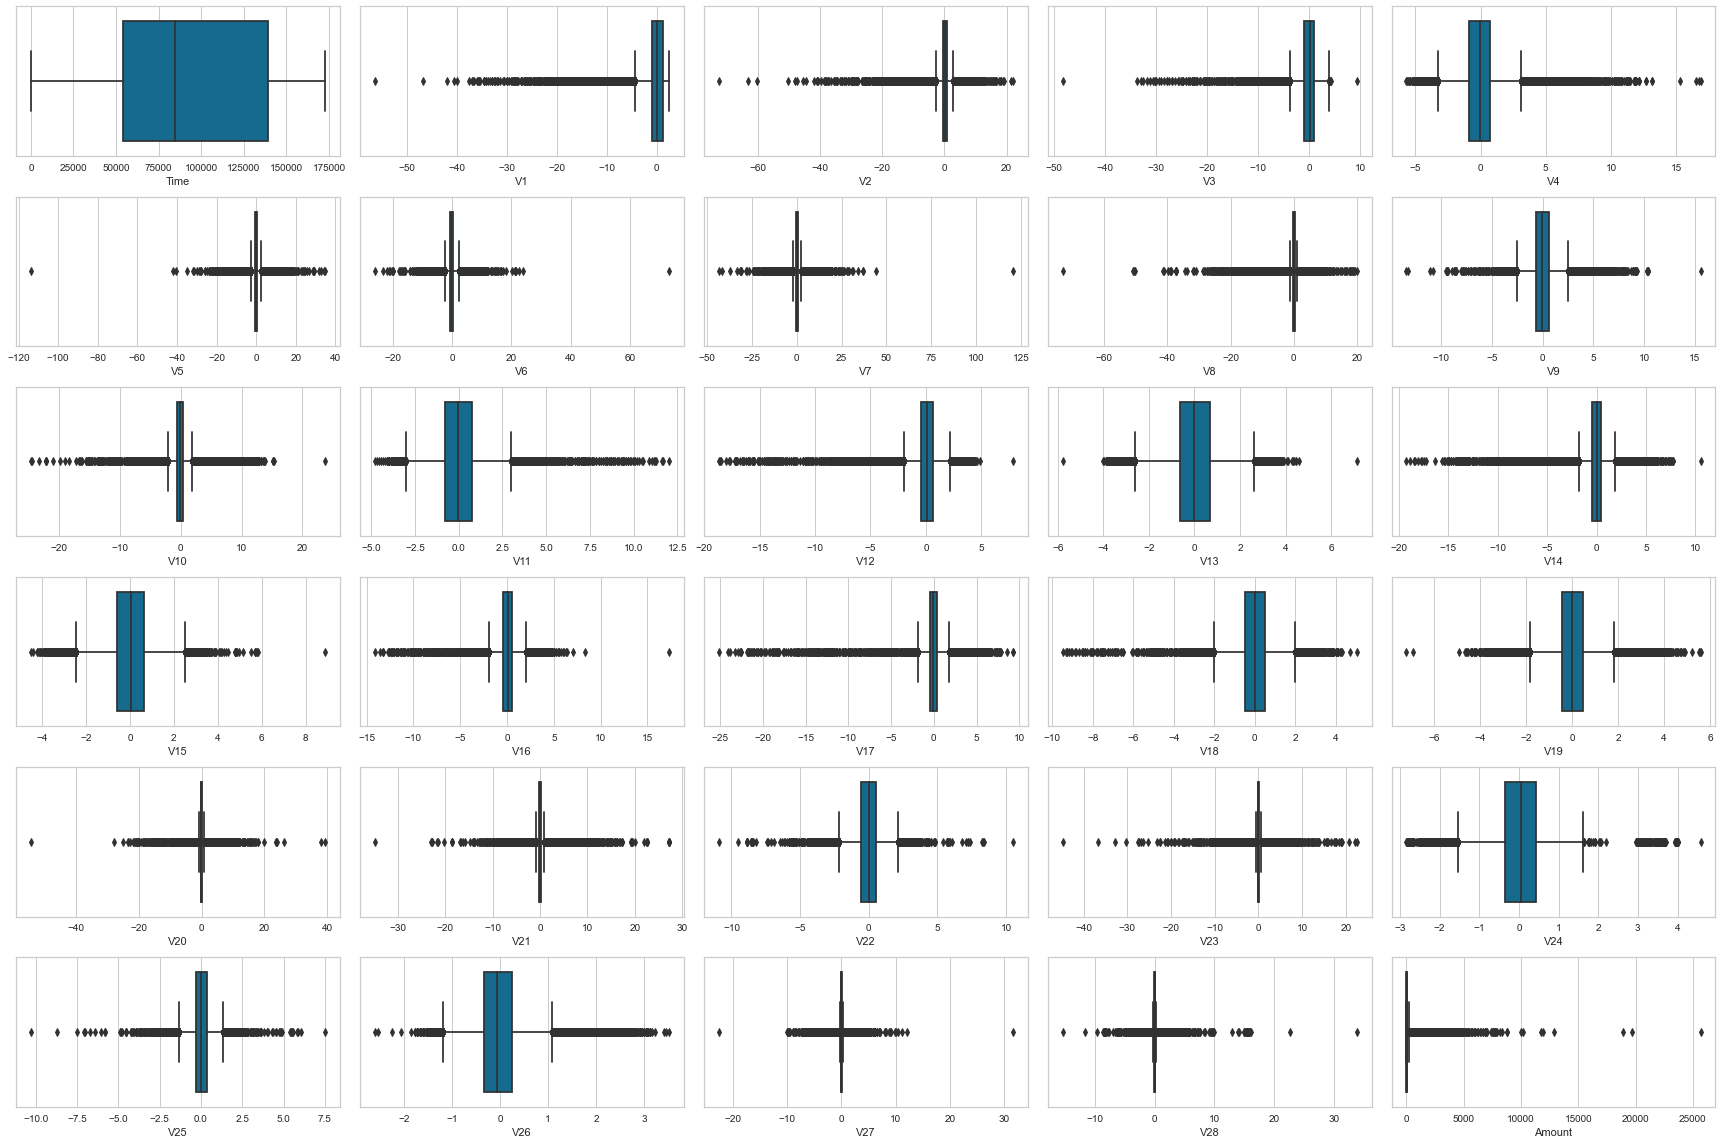

In [130]:
plt.figure(figsize=(24, 16))
index = 0
for boxplot in df.drop(['Class','Hour'],axis=1).select_dtypes('number').columns:
    index += 1
    plt.subplot(6,5,index)
    sns.boxplot(x = boxplot, data=df)
plt.tight_layout();

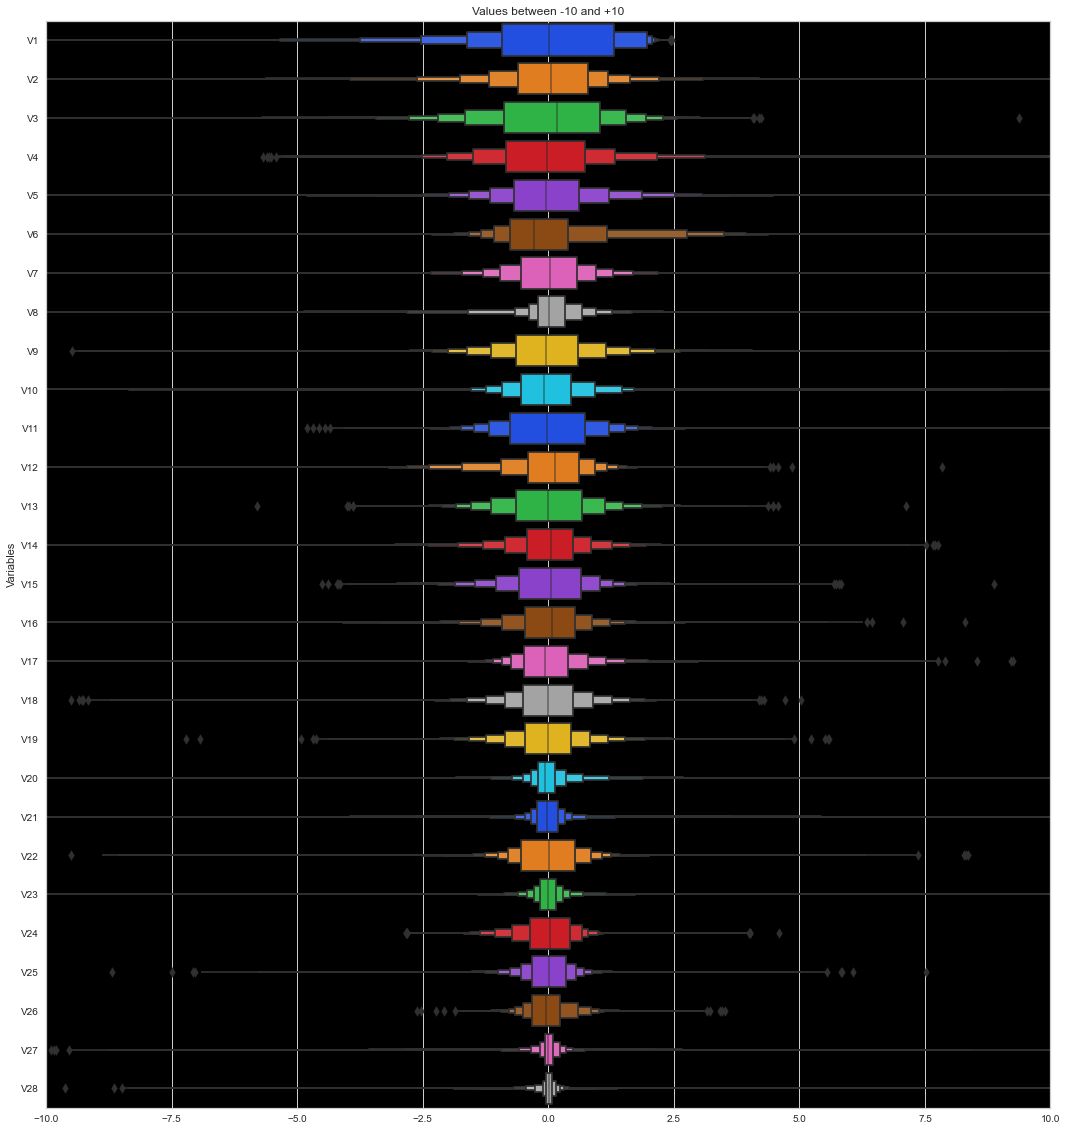

In [131]:
f, ax = plt.subplots(figsize=(18, 20))

ax.set_facecolor('black')
ax.set(xlim=(-10, 10))
plt.ylabel('Variables')
plt.title("Values between -10 and +10")
ax = sns.boxenplot(data = df.drop(columns=['Hour','Time','Amount','Class']), 
  orient = 'h', 
  palette = 'bright')

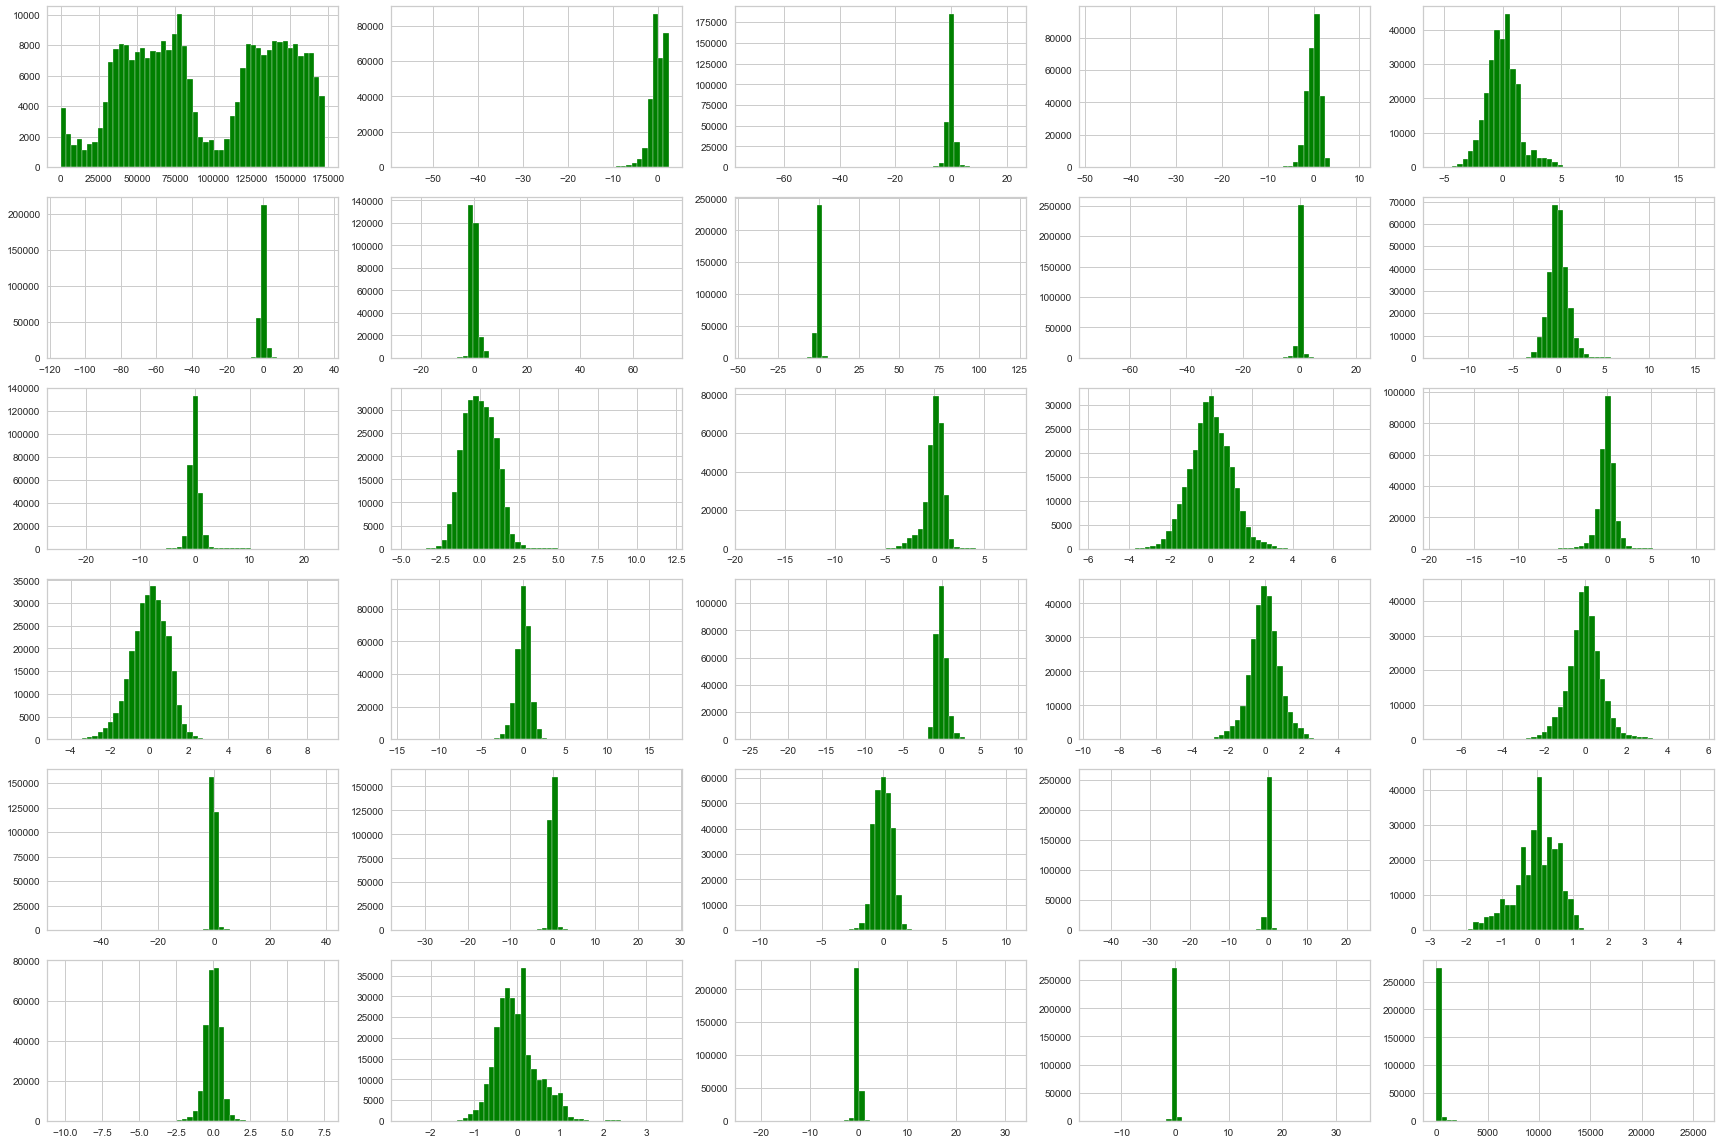

In [132]:
plt.figure(figsize=(24, 16))
index = 0
for hist in df.drop(['Class','Hour'],axis=1).select_dtypes('number').columns:
    index += 1
    plt.subplot(6,5,index)
    plt.hist(x = hist, data=df, bins=50, color='green')
plt.tight_layout();

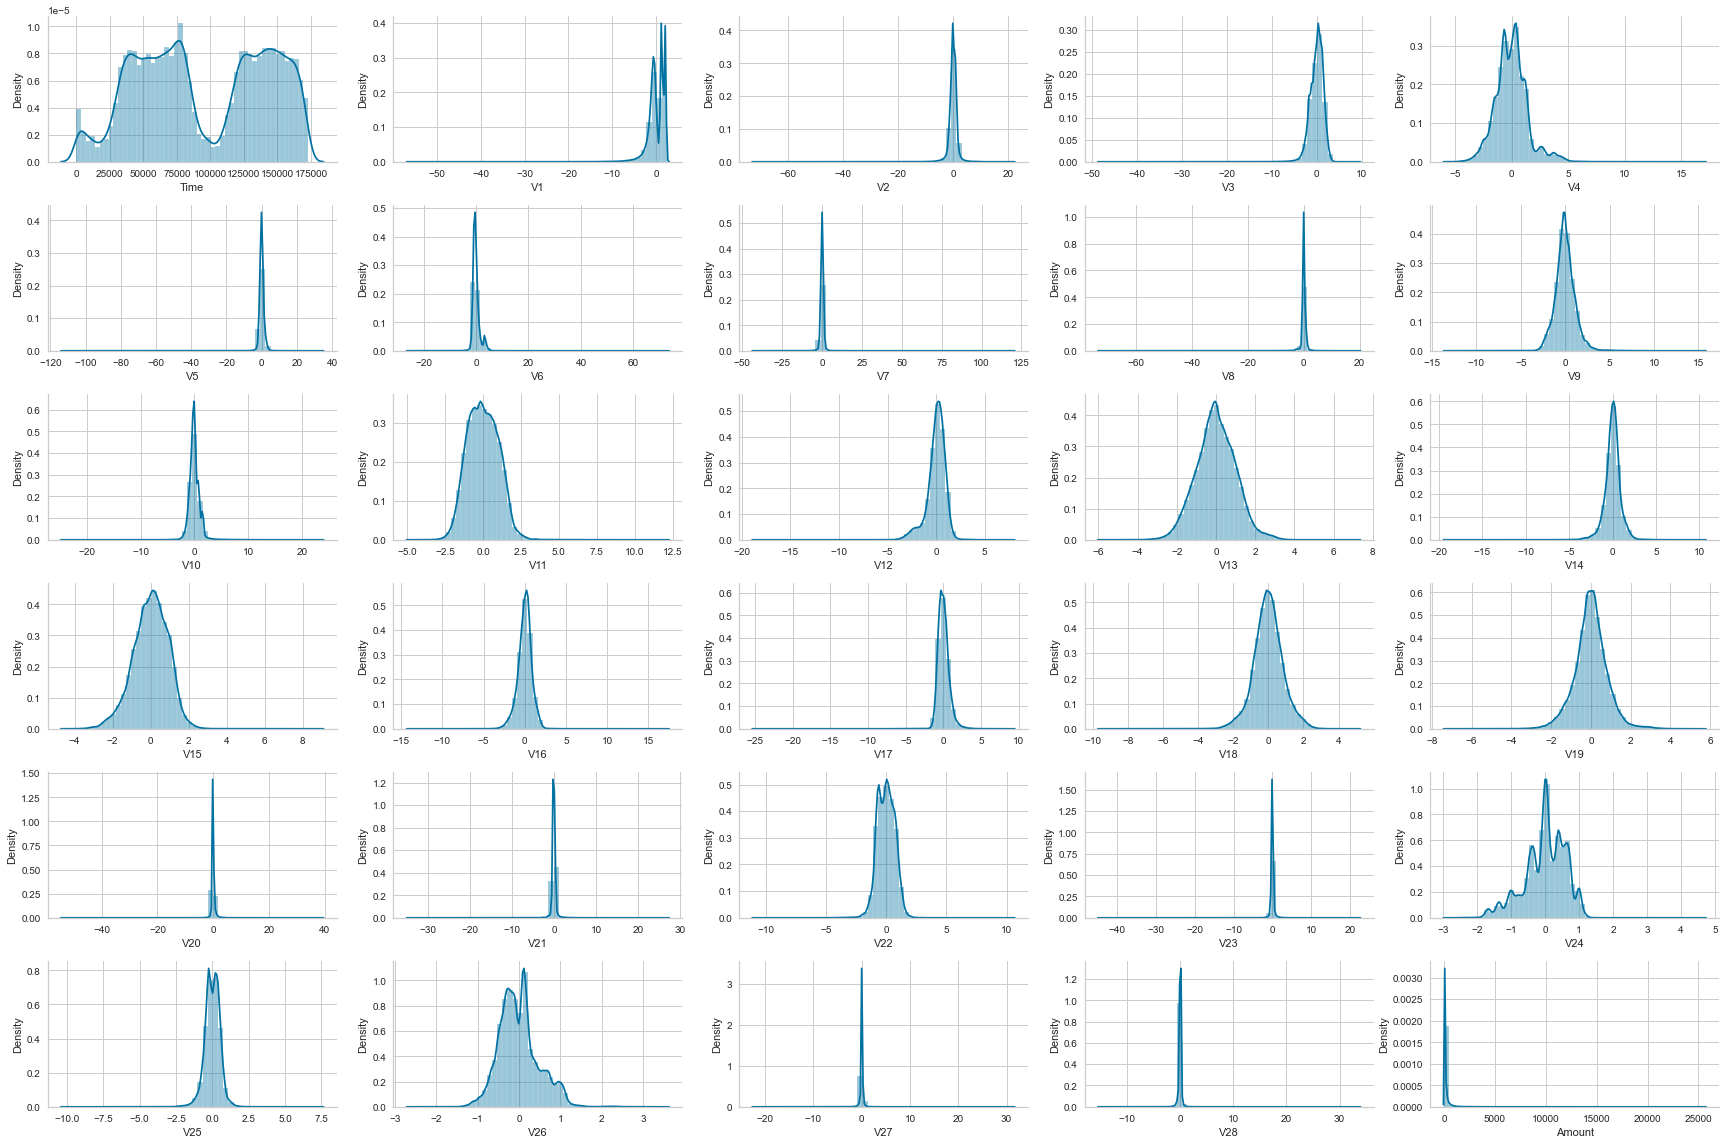

In [133]:
plt.figure(figsize=(24, 16))
index = 0
for dist in df.drop(['Class','Hour'],axis=1).select_dtypes('number').columns:
    index += 1
    plt.subplot(6,5,index)
    sns.distplot(df[dist])
    sns.despine()
plt.tight_layout();

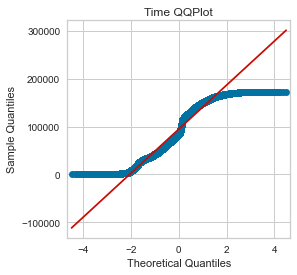

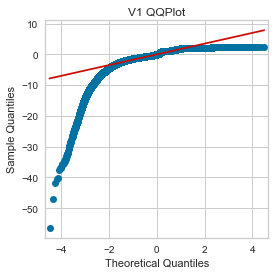

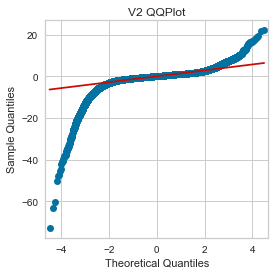

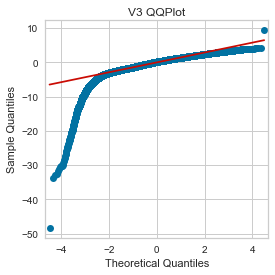

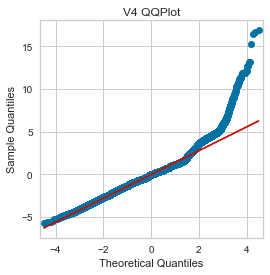

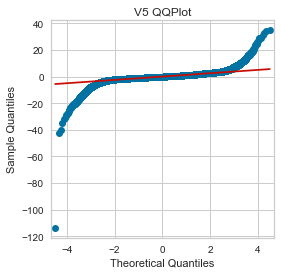

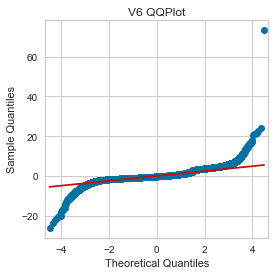

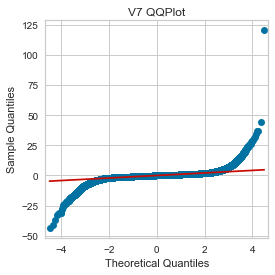

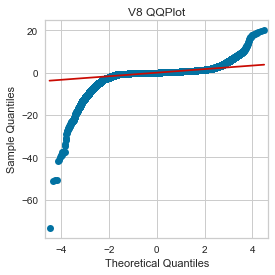

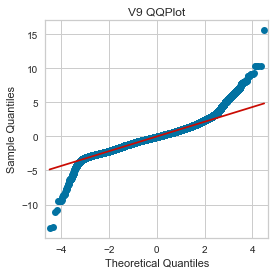

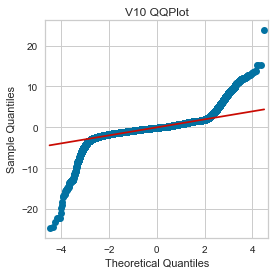

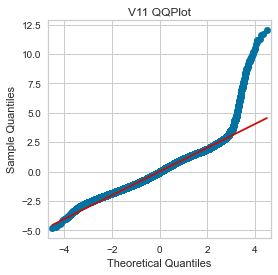

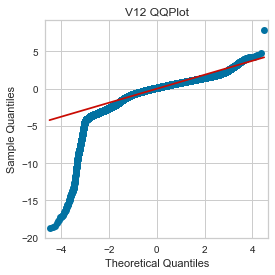

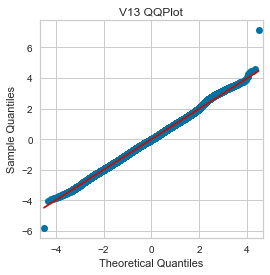

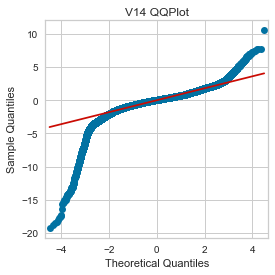

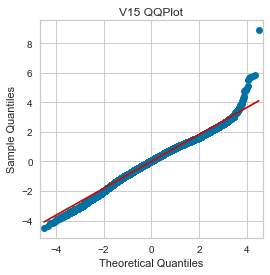

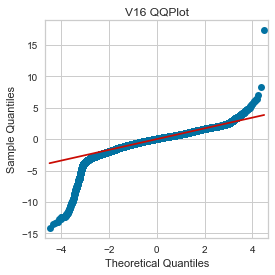

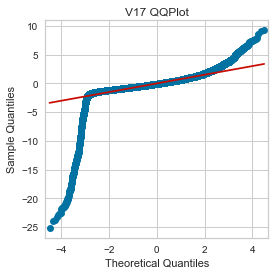

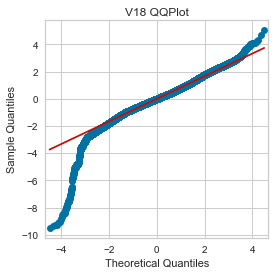

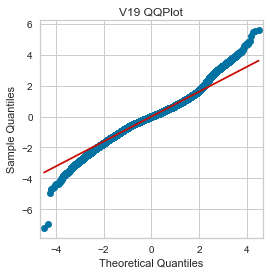

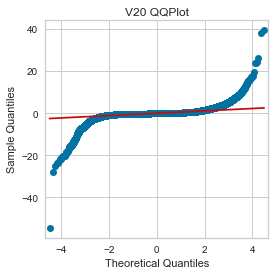

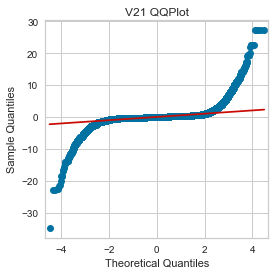

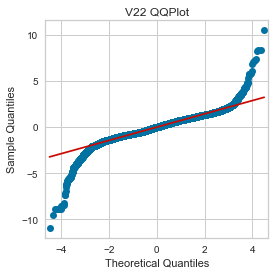

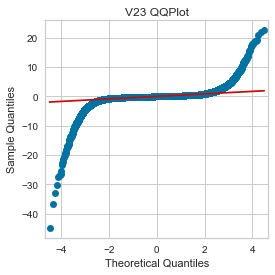

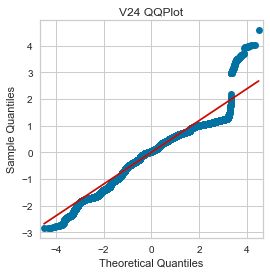

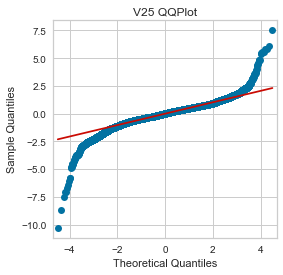

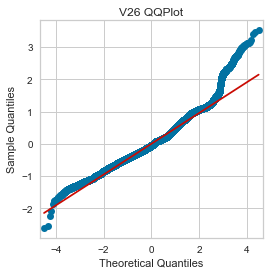

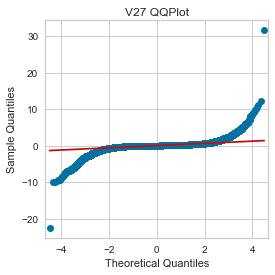

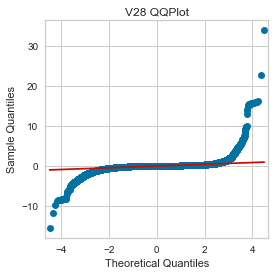

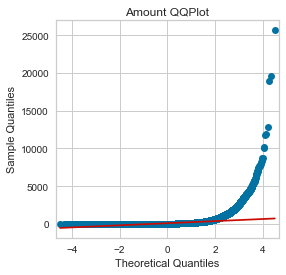

In [134]:
for qq in df.drop(['Class','Hour'],axis=1).select_dtypes('number').columns:
    plt.rc("figure", figsize=(4,4))
    qqplot(df[qq],line='r')
    plt.title(f"{qq} QQPlot")
plt.show();

In [135]:
# IQR Classic Outlier Method

In [136]:
def find_outliers_IQR(col):

    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1

    outliers = (df[col][((df[col]<(q1-1.5*IQR)) | (df[col]>(q3+1.5*IQR)))]).count()

    return outliers

In [137]:
IQR_total_count = 0

for col in df.drop('Hour',axis=1).select_dtypes('number').columns:
    print(f"'{col}' IQR method Outlier Count: {find_outliers_IQR(col)}")
    IQR_total_count += find_outliers_IQR(col)
    
print('-------------------------------------')
print(f"Total IQR method Outlier Count: {IQR_total_count}")

'Time' IQR method Outlier Count: 0
'V1' IQR method Outlier Count: 6962
'V2' IQR method Outlier Count: 13406
'V3' IQR method Outlier Count: 3324
'V4' IQR method Outlier Count: 11106
'V5' IQR method Outlier Count: 12231
'V6' IQR method Outlier Count: 22896
'V7' IQR method Outlier Count: 8856
'V8' IQR method Outlier Count: 23918
'V9' IQR method Outlier Count: 8213
'V10' IQR method Outlier Count: 9365
'V11' IQR method Outlier Count: 753
'V12' IQR method Outlier Count: 15300
'V13' IQR method Outlier Count: 3362
'V14' IQR method Outlier Count: 14078
'V15' IQR method Outlier Count: 2886
'V16' IQR method Outlier Count: 8194
'V17' IQR method Outlier Count: 7371
'V18' IQR method Outlier Count: 7482
'V19' IQR method Outlier Count: 10153
'V20' IQR method Outlier Count: 27564
'V21' IQR method Outlier Count: 14419
'V22' IQR method Outlier Count: 1306
'V23' IQR method Outlier Count: 18475
'V24' IQR method Outlier Count: 4758
'V25' IQR method Outlier Count: 5333
'V26' IQR method Outlier Count: 5665
'V

In [138]:
# WINSORIZATION Outlier METHOD(PERCENTILE CAPPING) 
# If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.

In [139]:
W_out_total = []
def Winsorization_outliers(df):
    W_out=[]
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            W_out.append(i)
    W_out_total.append(len(W_out))
    return len(W_out)

In [140]:
for col in df.drop('Hour',axis=1).select_dtypes('number').columns:
    print(f"'{col}' Winsorization method Outlier Count: {Winsorization_outliers(df[col])}")

W_total_count = sum(W_out_total)
print('-------------------------------------')
print(f"Total Winsorization Outlier Count: {W_total_count}")

'Time' Winsorization method Outlier Count: 5676
'V1' Winsorization method Outlier Count: 5676
'V2' Winsorization method Outlier Count: 5676
'V3' Winsorization method Outlier Count: 5676
'V4' Winsorization method Outlier Count: 5676
'V5' Winsorization method Outlier Count: 5676
'V6' Winsorization method Outlier Count: 5676
'V7' Winsorization method Outlier Count: 5676
'V8' Winsorization method Outlier Count: 5676
'V9' Winsorization method Outlier Count: 5674
'V10' Winsorization method Outlier Count: 5676
'V11' Winsorization method Outlier Count: 5676
'V12' Winsorization method Outlier Count: 5676
'V13' Winsorization method Outlier Count: 5676
'V14' Winsorization method Outlier Count: 5676
'V15' Winsorization method Outlier Count: 5676
'V16' Winsorization method Outlier Count: 5676
'V17' Winsorization method Outlier Count: 5676
'V18' Winsorization method Outlier Count: 5676
'V19' Winsorization method Outlier Count: 5676
'V20' Winsorization method Outlier Count: 5676
'V21' Winsorization m

In [141]:
df = df.drop("Hour", axis=1)

In [142]:
# with outliers to save data
df.to_csv('with_outlier.csv')

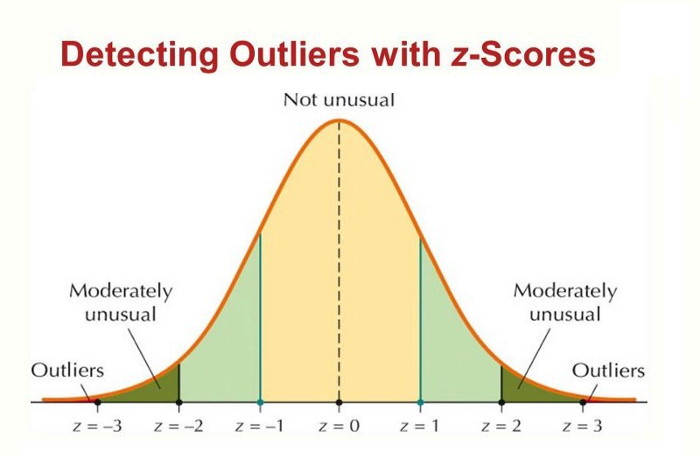

In [143]:
# We will use Zscore Outlier detection

from IPython.display import Image
Image(filename='zscore.png', width=500)

In [144]:
df_NoFraud = df[df["Class"] == 0]
df_Fraud = df[df["Class"] == 1]

print(f"No Fraud Dataset shape:{df_NoFraud.shape}")
print(f"Fraud Dataset shape:{df_Fraud.shape}")

No Fraud Dataset shape:(283253, 31)
Fraud Dataset shape:(492, 31)


In [145]:
# We will drop outliers with Zscore Method(z=3) in df_NoFraud data beacuses we need Class = 1 values.

In [146]:
def z_score_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score method.
    """
    
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[z_score > threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[z_score > threshold]
    return df1.shape[0]
    
    return multiple_outliers

In [147]:
Z_total = 0
for col in df_NoFraud.drop("Class",axis=1).columns:
    print(f"'{col}' Total number of outliers is: {z_score_method(df_NoFraud, 1, [col])}")
    Z_total += z_score_method(df_NoFraud, 1, [col])
    
print("-------------------------------------------")
print(f"Zscore Method Total Outlier Count: {Z_total}")

'Time' Total number of outliers is: 0
'V1' Total number of outliers is: 3670
'V2' Total number of outliers is: 4277
'V3' Total number of outliers is: 1943
'V4' Total number of outliers is: 3124
'V5' Total number of outliers is: 2906
'V6' Total number of outliers is: 4624
'V7' Total number of outliers is: 3513
'V8' Total number of outliers is: 4190
'V9' Total number of outliers is: 2177
'V10' Total number of outliers is: 3333
'V11' Total number of outliers is: 454
'V12' Total number of outliers is: 4221
'V13' Total number of outliers is: 1187
'V14' Total number of outliers is: 3716
'V15' Total number of outliers is: 1247
'V16' Total number of outliers is: 2192
'V17' Total number of outliers is: 3079
'V18' Total number of outliers is: 1651
'V19' Total number of outliers is: 3364
'V20' Total number of outliers is: 4586
'V21' Total number of outliers is: 4082
'V22' Total number of outliers is: 1203
'V23' Total number of outliers is: 3352
'V24' Total number of outliers is: 656
'V25' Total n

In [148]:
outlier_list = []
    
for column in df_NoFraud.drop("Class",axis=1).columns:
    # calculate the mean and standard deviation of the data frame
    data_mean = df_NoFraud[column].mean()
    data_std = df_NoFraud[column].std()
    threshold = 3
        
    z_score = abs( (df_NoFraud[column] - data_mean)/data_std )
        
    # Determining a list of indices of outliers for feature column        
    outlier_list_column =  df_NoFraud[z_score > threshold].index
        
    # appending the found outlier indices for column to the list of outlier indices 
    outlier_list.extend(outlier_list_column)

In [149]:
len(outlier_list)

84515

In [150]:
df_outlier = pd.DataFrame(outlier_list, columns=["index_no"])

In [151]:
df_outlier.duplicated(keep="first").sum()

44483

In [152]:
df_outlier.drop_duplicates(keep="first", inplace=True)

In [153]:
df_outlier.head()

index_no
0       164
1       290
2      1158
3      1632
4      2178

In [154]:
zscore_outliers_index = df_outlier["index_no"].values

In [155]:
df_NoFraud.drop(index=zscore_outliers_index, inplace=True)

In [156]:
df_NoFraud.shape, df_Fraud.shape

((243221, 31), (492, 31))

In [157]:
df_NoFraud.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   
5  0.260314 -0.568671 -0.371407  1.341262  0.359894 -0.358091 -0.137134   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   
5  0.517617  0.401726 -0.058133  0.068653 -0.033194  0.084968 -0.208254   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
5 -0.559825 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080   

   Amount  Class  
0  149.62      0  
1    2.69      0  
3  123.50      0  
4   69.99      0  
5    3.67      0

In [158]:
df_Fraud.head()

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9       V10       V11        V12       V13  \
541  -2.537387  1.391657 -2.770089 -2.772272  3.202033  -2.899907 -0.595222   
623   0.325574 -0.067794 -0.270953 -0.838587 -0.414575  -0.503141  0.676502   
4920  0.562320 -0.399147 -0.238253 -1.525412  2.032912  -6.560124  0.022937   
6108 -3.496197 -0.248778 -0.247768 -4.801637  4.895844 -10.912819  0.184372   
6329  1.713445 -0.496358 -1.282858 -2.447469  2.101344  -4.609628  1.464378   

           V14       V15       V16        V17       V18       V19       V20  \
541  -4.289254  0.389724 -1.140747  -2.830056 -0.016822  0.416956  0.126911   
623  -1.692029  2.000635  0.666780   0.599717  1.725321  0.283345  2.102339   
4920 -1.470102 -0.698826 -2.282194  -4.781831 -2.615665 -1.334441 -0.430022   
6108 -6.771097 -0.007326 -7.358083 -12.598419 -5.131549  0.308334 -0.171608   
6329 -6.079337 -0.339237  2.581851   6.739384  3.042493 -2.721853  0.009061   

           V21       V22       V23       V24       V25       V26       V27  \
541   0.517232 -0.035049 -0.465211  0.320198  0.044519  0.177840  0.261145   
623   0.661696  0.435477  1.375966 -0.293803  0.279798 -0.145362 -0.252773   
4920 -0.294166 -0.932391  0.172726 -0.087330 -0.156114 -0.542628  0.039566   
6108  0.573574  0.176968 -0.436207 -0.053502  0.252405 -0.657488 -0.827136   
6329 -0.379068 -0.704181 -0.656805 -1.632653  1.488901  0.566797 -0.010016   

           V28  Amount  Class  
541  -0.143276    0.00      1  
623   0.035764  529.00      1  
4920 -0.153029  239.93      1  
6108  0.849573   59.00      1  
6329  0.146793    1.00      1

In [159]:
df2 = pd.concat([df_Fraud, df_NoFraud]).reset_index(drop=True)

In [160]:
df2.shape

(243713, 31)

In [161]:
df2.head()

Time        V1        V2        V3        V4        V5        V6  \
0   406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1   472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

         V7        V8        V9       V10       V11        V12       V13  \
0 -2.537387  1.391657 -2.770089 -2.772272  3.202033  -2.899907 -0.595222   
1  0.325574 -0.067794 -0.270953 -0.838587 -0.414575  -0.503141  0.676502   
2  0.562320 -0.399147 -0.238253 -1.525412  2.032912  -6.560124  0.022937   
3 -3.496197 -0.248778 -0.247768 -4.801637  4.895844 -10.912819  0.184372   
4  1.713445 -0.496358 -1.282858 -2.447469  2.101344  -4.609628  1.464378   

        V14       V15       V16        V17       V18       V19       V20  \
0 -4.289254  0.389724 -1.140747  -2.830056 -0.016822  0.416956  0.126911   
1 -1.692029  2.000635  0.666780   0.599717  1.725321  0.283345  2.102339   
2 -1.470102 -0.698826 -2.282194  -4.781831 -2.615665 -1.334441 -0.430022   
3 -6.771097 -0.007326 -7.358083 -12.598419 -5.131549  0.308334 -0.171608   
4 -6.079337 -0.339237  2.581851   6.739384  3.042493 -2.721853  0.009061   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.517232 -0.035049 -0.465211  0.320198  0.044519  0.177840  0.261145   
1  0.661696  0.435477  1.375966 -0.293803  0.279798 -0.145362 -0.252773   
2 -0.294166 -0.932391  0.172726 -0.087330 -0.156114 -0.542628  0.039566   
3  0.573574  0.176968 -0.436207 -0.053502  0.252405 -0.657488 -0.827136   
4 -0.379068 -0.704181 -0.656805 -1.632653  1.488901  0.566797 -0.010016   

        V28  Amount  Class  
0 -0.143276    0.00      1  
1  0.035764  529.00      1  
2 -0.153029  239.93      1  
3  0.849573   59.00      1  
4  0.146793    1.00      1

In [162]:
df2.Class.value_counts(normalize=True)

0    0.997981
1    0.002019
Name: Class, dtype: float64

In [163]:
# without outliers to save data
df2.to_csv('without_outlier.csv') # We will work dataset which without outliers for ML modelling

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [164]:
df = pd.read_csv("without_outlier.csv", index_col=0)
df

Time        V1        V2        V3        V4        V5        V6  \
0          406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1          472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2         4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3         6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4         7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
243708  172784.0  2.039560 -0.175233 -1.196825  0.234580 -0.008713 -0.726571   
243709  172785.0  0.120316  0.931005 -0.546012 -0.745097  1.130314 -0.235973   
243710  172787.0 -0.732789 -0.055080  2.035030 -0.738589  0.868229  1.058415   
243711  172788.0  1.919565 -0.301254 -3.249640 -0.557828  2.630515  3.031260   
243712  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10       V11        V12       V13  \
0      -2.537387  1.391657 -2.770089 -2.772272  3.202033  -2.899907 -0.595222   
1       0.325574 -0.067794 -0.270953 -0.838587 -0.414575  -0.503141  0.676502   
2       0.562320 -0.399147 -0.238253 -1.525412  2.032912  -6.560124  0.022937   
3      -3.496197 -0.248778 -0.247768 -4.801637  4.895844 -10.912819  0.184372   
4       1.713445 -0.496358 -1.282858 -2.447469  2.101344  -4.609628  1.464378   
...          ...       ...       ...       ...       ...        ...       ...   
243708  0.017050 -0.118228  0.435402  0.267772  0.523316   0.559047 -0.834660   
243709  0.812722  0.115093 -0.204064 -0.657422  0.644837   0.190916 -0.546329   
243710  0.024330  0.294869  0.584800 -0.975926 -0.150189   0.915802  1.214756   
243711 -0.296827  0.708417  0.432454 -0.484782  0.411614   0.063119 -0.183699   
243712  1.577006 -0.414650  0.486180 -0.915427 -1.040458  -0.031513 -0.188093   

             V14       V15       V16        V17       V18       V19       V20  \
0      -4.289254  0.389724 -1.140747  -2.830056 -0.016822  0.416956  0.126911   
1      -1.692029  2.000635  0.666780   0.599717  1.725321  0.283345  2.102339   
2      -1.470102 -0.698826 -2.282194  -4.781831 -2.615665 -1.334441 -0.430022   
3      -6.771097 -0.007326 -7.358083 -12.598419 -5.131549  0.308334 -0.171608   
4      -6.079337 -0.339237  2.581851   6.739384  3.042493 -2.721853  0.009061   
...          ...       ...       ...        ...       ...       ...       ...   
243708  0.626211 -0.541494  0.225361  -0.605252 -0.163049  0.561695 -0.256922   
243709 -0.731707 -0.808036  0.599628   0.070441  0.373110  0.128904  0.000676   
243710 -0.675143  1.164931 -0.711757  -0.025693 -1.221179 -1.545556  0.059616   
243711 -0.510602  1.329284  0.140716   0.313502  0.395652 -0.577252  0.001396   
243712 -0.084316  0.041333 -0.302620  -0.660377  0.167430 -0.256117  0.382948   

             V21       V22       V23       V24       V25       V26       V27  \
0       0.517232 -0.035049 -0.465211  0.320198  0.044519  0.177840  0.261145   
1       0.661696  0.435477  1.375966 -0.293803  0.279798 -0.145362 -0.252773   
2      -0.294166 -0.932391  0.172726 -0.087330 -0.156114 -0.542628  0.039566   
3       0.573574  0.176968 -0.436207 -0.053502  0.252405 -0.657488 -0.827136   
4      -0.379068 -0.704181 -0.656805 -1.632653  1.488901  0.566797 -0.010016   
...          ...       ...       ...       ...       ...       ...       ...   
243708 -0.268048 -0.717211  0.297930 -0.359769 -0.315610  0.201114 -0.080826   
243709 -0.314205 -0.808520  0.050343  0.102800 -0.435870  0.124079  0.217940   
243710  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472   
243711  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455   
243712  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415   

             V28  Amount  Class  
0      -0.143276    0.00      1  
1       0.035764  529.00      1  
2      -0.153029  239.93      1  
3       

In [165]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [167]:
X_train_y = X_train.merge(y_train, left_index=True, right_index=True)
X_test_y = X_test.merge(y_test, left_index=True, right_index=True)

In [168]:
ds_train = Dataset(X_train_y, label="Class",  cat_features=[])
ds_test =  Dataset(X_test_y,  label="Class",  cat_features=[])

In [169]:
result_val = train_test_validation().run(ds_train, ds_test)
result_val

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_VRLVGHDKGGBGVG598U128HVLF">Train Test Validat…

#### Scaling

In [170]:
scaler = StandardScaler()

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

**** Definition User Functions ****

In [171]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Model Training***

In [172]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

0    194576
1       394
Name: Class, dtype: int64

0    48645
1       98
Name: Class, dtype: int64


In [173]:
print(y_train.value_counts()[1] / y_train.value_counts()[0])
print()
print(y_test.value_counts()[1] / y_test.value_counts()[0])

0.0020249157141682427

0.0020145955391098775


In [174]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [175]:
y_pred = pipe_model.predict(X_test)
y_train_pred = pipe_model.predict(X_train)

In [176]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[9.99997484e-01, 2.51638177e-06],
       [9.98346105e-01, 1.65389488e-03],
       [9.99974115e-01, 2.58854960e-05],
       ...,
       [9.99938859e-01, 6.11410344e-05],
       [9.99960391e-01, 3.96093758e-05],
       [9.99974384e-01, 2.56158341e-05]])

In [177]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

Time        V1        V2        V3        V4        V5        V6  \
237610  167785.0  2.016454 -0.146430 -1.280967  0.277121 -0.103697 -1.039504   
158320  126411.0 -1.110504  1.784003 -0.544730  0.584269  0.865272 -0.409352   
123389   84224.0  1.040181 -0.397633  1.155106  1.763731 -0.949250  0.540715   
78429    63262.0 -0.224494  1.107635 -0.073620  1.655890  2.790179  3.968977   
221320  158870.0  2.086720  0.121716 -2.039951  0.080572  0.990610  0.047995   
145193  119642.0  1.737367 -0.383861 -0.450562  1.454441 -0.168216  0.289400   
210002  152943.0 -0.774936  0.461685  1.594383 -0.468089 -0.220687 -0.201938   
206978  151462.0 -0.845614  0.665457  0.647567 -3.230318 -0.236579 -1.298313   
6750     11231.0  1.126968  0.707538 -0.012331  2.555788  0.734877 -0.005958   
99824    73675.0  1.081524  0.038653  0.199946  1.043556 -0.042364  0.107647   

              V7        V8        V9       V10       V11       V12       V13  \
237610  0.054963 -0.166101  0.524264  0.213636  0.910749  0.351371 -1.321862   
158320  1.251999 -0.049839 -0.003489  1.430013  0.277802  0.082575 -1.099167   
123389 -0.672329  0.416344  1.618582 -0.353976 -1.521552 -0.313106 -2.703355   
78429   0.356682  0.857392 -1.891941  0.727910 -0.328088 -0.689447  0.016012   
221320  0.090594 -0.042187  0.199440 -0.234498  0.498068  0.893756  0.749941   
145193 -0.154529  0.058690  0.728133  0.071038  0.381094  2.062127  1.138446   
210002  0.694657  0.130034  0.144355 -0.711557 -0.739351 -0.082905 -0.259018   
206978  0.403576  0.292361  1.162536 -2.144304 -0.995953  1.250295  1.097657   
6750    0.513535 -0.257664  0.120131  0.273549  0.342755 -2.231738  2.567338   
99824  -0.051482  0.142615 -0.135171  0.193505  1.062981  0.397471 -0.818960   

             V14       V15       V16       V17       V18       V19       V20  \
237610  0.950392  0.222066 -0.043272 -0.593268  0.471327 -0.037033 -0.327188   
158320  0.540058 -0.835296 -0.956328 -0.170388  0.266991  1.062418  0.469059   
123389 -0.252368 -1.434545 -1.030489  0.915259 -1.051632  0.184096 -0.326302   
78429   0.580898  1.202638  0.046272 -0.396794  0.392366  1.256108  0.311491   
221320 -0.818520 -0.451421  0.682365 -0.076991  0.310408  0.598937 -0.083813   
145193 -0.340196 -1.980686 -0.242011 -0.439049 -0.513506  0.512027 -0.013983   
210002 -0.144147  0.225201  0.303684 -0.468704 -0.208385 -0.347107  0.277717   
206978 -0.071399 -0.110535  0.133296 -0.778311 -0.282697 -0.493932 -0.144923   
6750    1.787523 -0.334645  0.117268  0.303695 -0.613392 -1.283087 -0.064932   
99824   0.706391  0.608836  0.195531 -0.518327  0.196043 -0.427026 -0.109779   

             V21       V22       V23       V24       V25       V26       V27  \
237610  0.293092  0.922631  0.020519  0.020101  0.168591 -0.123839 -0.028410   
158320 -0.010963  0.571662 -0.260355 -0.413073  0.231862 -0.347191  0.870580   
123389 -0.431638 -0.928232  0.096231  0.003063  0.335674 -0.503051  0.071786   
78429   0.019415 -0.136058 -0.166035  1.005822  0.055621  0.229015  0.107665   
221320 -0.358197 -0.919998  0.218023 -0.434935 -0.164416  0.211994 -0.060357   
145193 -0.415556 -1.053883  0.296952 -0.437963 -0.305556 -1.109527  0.046518   
210002 -0.117507 -0.437004  0.266498  1.105674 -0.344977 -0.043383  0.300882   
206978 -0.128844 -0.270705  0.032922 -0.111298 -0.421002 -0.795719  0.288973   
6750   -0.129741 -0.179965 -0.180365 -0.461488  0.711836  0.082436 -0.054350   
99824   0.146192  0.326603 -0.164036 -0.317427  0.570733 -0.250278  0.016347   

             V28  Amount  Class  pred    pred_proba  
237610 -0.071379    1.00      0     0  1.220864e-05  
158320  0.490067   17.18      0     0  1.360873e-05  
123389  0.026782   30.06      0     0  9.424665e-05  
78429   0.123783   32.35      0     0  1.266577e-04  
221320 -0.048886    1.29      0     0  9.159520e-06  
145193 -0.026020   95.00      0     0  1.668272e-05  
210002  0.216007   99.99      0     0  3.210064e-06  
206978  0.169332    8.56      0     0  4.512402e-08  
67

In [178]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[48644     1]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48645
           1       0.99      0.85      0.91        98

    accuracy                           1.00     48743
   macro avg       0.99      0.92      0.96     48743
weighted avg       1.00      1.00      1.00     48743


Train_Set
[[194575      1]
 [    51    343]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    194576
           1       1.00      0.87      0.93       394

    accuracy                           1.00    194970
   macro avg       1.00      0.94      0.96    194970
weighted avg       1.00      1.00      1.00    194970



In [179]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)  

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1   1.315851    0.025328        1.000000         0.996785     0.820513   
2   1.467944    0.015764        1.000000         0.996785     0.820513   
3   1.268463    0.016361        1.000000         0.996774     0.897436   
4   1.365597    0.031368        1.000000         0.996774     0.846154   
5   1.474577    0.032744        1.000000         0.993548     0.897436   
6   1.302643    0.015622        1.000000         0.996785     0.846154   
7   1.453433    0.006391        0.972222         1.000000     0.875000   
8   1.515844    0.015608        1.000000         0.996764     0.875000   
9   1.432374    0.031253        1.000000         0.996753     0.900000   
10  1.385246    0.031261        1.000000         0.996774     0.875000   

    train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1       0.873239  0.901408  0.930931       0.999641        0.999738  
2       0.873239  0.901408  0.930931       0.999641        0.999738  
3       0.870423  0.945946  0.929323       0.999795        0.999732  
4       0.870423  0.916667  0.929323       0.999692        0.999732  
5       0.867606  0.945946  0.926316       0.999795        0.999721  
6       0.873239  0.916667  0.930931       0.999692        0.999738  
7       0.872881  0.921053  0.932127       0.999692        0.999744  
8       0.870056  0.933333  0.929110       0.999744        0.999732  
9       0.867232  0.947368  0.927492       0.999795        0.999726  
10      0.872881  0.933333  0.930723       0.999744        0.999738

In [180]:
df_scores.mean()[2:] # no overfitting

test_precision     0.997222
train_precision    0.996774
test_recall        0.865321
train_recall       0.871122
test_f1            0.926313
train_f1           0.929721
test_accuracy      0.999723
train_accuracy     0.999734
dtype: float64


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


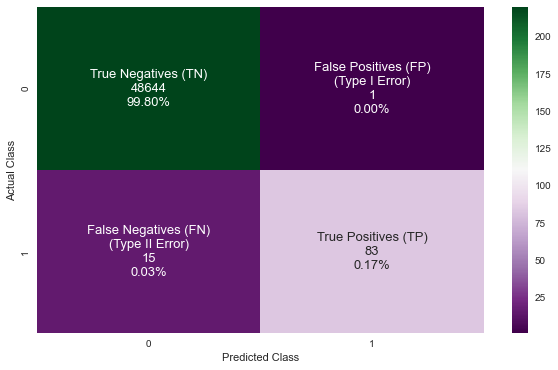

In [181]:
plt.figure(figsize=(10,6))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='PRGn', vmax=220)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

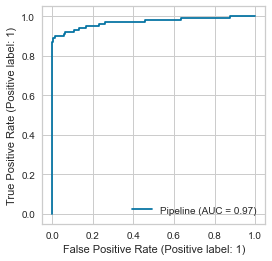

In [182]:
plot_roc_curve(pipe_model, X_test, y_test);

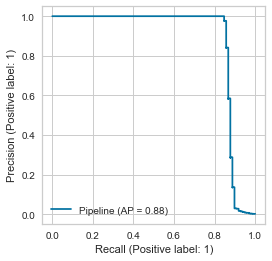

In [183]:
plot_precision_recall_curve(pipe_model, X_test, y_test);

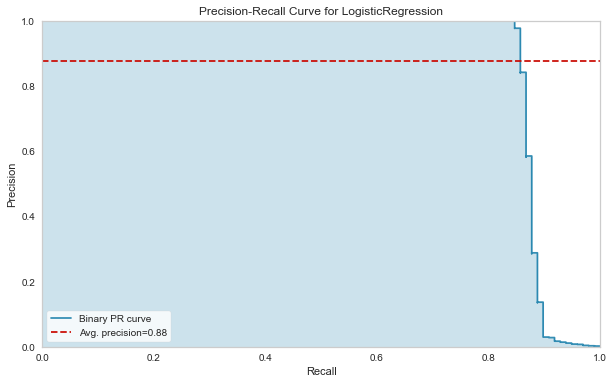

In [184]:
plt.figure(figsize=(10,6))
viz = PrecisionRecallCurve(pipe_model, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [185]:
y_pred_proba = pipe_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.8770898353288732

In [186]:
# saving scores
y_pred = pipe_model.predict(X_test)

log_auc = roc_auc_score(y_test, y_pred,average=None)
log_f1 = f1_score(y_test, y_pred, average=None)
log_pre = precision_score(y_test, y_pred, average=None)
log_recall = recall_score(y_test, y_pred, average=None)

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [187]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(ds_train, ds_test, pipe_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 22 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_ZO24N4A23KLNXVH2DIHG5UGR0">Model Evaluation S…

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

In [188]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

***ii. Model Training***

In [190]:
# OverSample Tech. with imbpipeline
over_pipeline = imbpipeline(steps = [['over', RandomOverSampler(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['logistic', LogisticRegression(random_state=42)]])


log_over_model = over_pipeline.fit(X_train, y_train)
log_over_prediction = log_over_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = RandomOverSampler(random_state=42).fit_resample(X, y)
print("OverSample data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 243221, 1: 492})
OverSample data distribution: Counter({1: 243221, 0: 243221})


In [191]:
eval_metric(log_over_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[47708   937]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     48645
           1       0.09      0.90      0.16        98

    accuracy                           0.98     48743
   macro avg       0.54      0.94      0.57     48743
weighted avg       1.00      0.98      0.99     48743


Train_Set
[[238531   4690]
 [ 14218 229003]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    243221
           1       0.98      0.94      0.96    243221

    accuracy                           0.96    486442
   macro avg       0.96      0.96      0.96    486442
weighted avg       0.96      0.96      0.96    486442



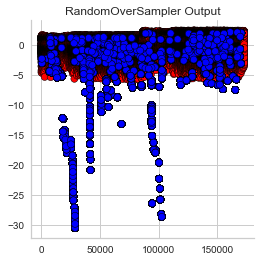

In [192]:
colors = ['red' if v == 0 else 'blue' if v == 1 else 'yellow' for v in y_smote]
plt.scatter(X_smote.iloc[:, 0], X_smote.iloc[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output");

In [193]:
# UnderSample Tech. with imbpipeline

under_pipeline = imbpipeline(steps = [['under', RandomUnderSampler(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['logistic', LogisticRegression(random_state=42)]])


log_under_model = under_pipeline.fit(X_train, y_train)
log_under_prediction = log_under_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = RandomUnderSampler(random_state=42).fit_resample(X, y)
print("UnderSample data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 243221, 1: 492})
UnderSample data distribution: Counter({0: 492, 1: 492})


In [194]:
eval_metric(log_under_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[47802   843]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     48645
           1       0.09      0.90      0.17        98

    accuracy                           0.98     48743
   macro avg       0.55      0.94      0.58     48743
weighted avg       1.00      0.98      0.99     48743


Train_Set
[[484   8]
 [ 32 460]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       492
           1       0.98      0.93      0.96       492

    accuracy                           0.96       984
   macro avg       0.96      0.96      0.96       984
weighted avg       0.96      0.96      0.96       984



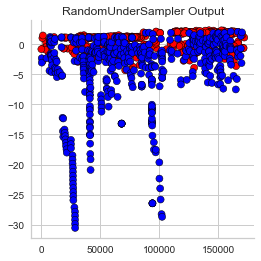

In [195]:
colors = ['red' if v == 0 else 'blue' if v == 1 else 'yellow' for v in y_smote]
plt.scatter(X_smote.iloc[:, 0], X_smote.iloc[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output");

In [196]:
# build model with SMOTE imbpipeline

smote_pipeline = imbpipeline(steps = [['smote', SMOTE( random_state=42)],
                                ['scaler', StandardScaler()],
                                ['logistic', LogisticRegression(random_state=42)]])


log_smote_model = smote_pipeline.fit(X_train, y_train)
log_smote_prediction = log_smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 243221, 1: 492})
SMOTE data distribution: Counter({1: 243221, 0: 243221})


In [197]:
eval_metric(log_smote_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[48373   272]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     48645
           1       0.24      0.88      0.38        98

    accuracy                           0.99     48743
   macro avg       0.62      0.94      0.69     48743
weighted avg       1.00      0.99      1.00     48743


Train_Set
[[241783   1438]
 [  4663 238558]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    243221
           1       0.99      0.98      0.99    243221

    accuracy                           0.99    486442
   macro avg       0.99      0.99      0.99    486442
weighted avg       0.99      0.99      0.99    486442



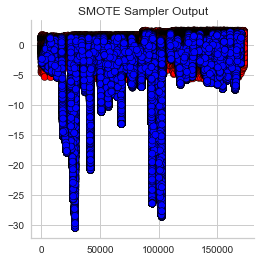

In [198]:
colors = ['red' if v == 0 else 'blue' if v == 1 else 'yellow' for v in y_smote]
plt.scatter(X_smote.iloc[:, 0], X_smote.iloc[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("SMOTE Sampler Output");

### !!! SMOTE over sampler technique is better than others techniques. So, we will use SMOTE tech. in all ML models.

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [199]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [201]:
pipeline = imbpipeline(steps = [['smote', SMOTE( random_state=42)],
                                ['scaler', StandardScaler()],
                                ['logistic', LogisticRegression(random_state=42)]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=42)
    
param_grid = {"logistic__C" : [0.001, 0.0015, 0.01, 0.015, 0.1, 1, 10]}

grid_smote_model = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_smote_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                       ['scaler', StandardScaler()],
                                       ['logistic',
                                        LogisticRegression(random_state=42)]]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.0015, 0.01, 0.015, 0.1, 1,
                                         10]},
             scoring='recall')

In [202]:
grid_smote_model.best_params_

{'logistic__C': 0.01}

In [203]:
grid_smote_model.best_score_

0.9213891593638429

In [204]:
eval_metric(grid_smote_model, X_train, y_train, X_test, y_test)

Test_Set
[[48378   267]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     48645
           1       0.24      0.88      0.38        98

    accuracy                           0.99     48743
   macro avg       0.62      0.94      0.69     48743
weighted avg       1.00      0.99      1.00     48743


Train_Set
[[193482   1094]
 [    29    365]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    194576
           1       0.25      0.93      0.39       394

    accuracy                           0.99    194970
   macro avg       0.63      0.96      0.70    194970
weighted avg       1.00      0.99      1.00    194970



In [205]:
fraud_pred_train = grid_smote_model.predict(X_train)
fraud_pred_test = grid_smote_model.predict(X_test)

recall_train = recall_score(y_train, fraud_pred_train)
recall_test = recall_score(y_test, fraud_pred_test)

print('Recall - Training set: ', round(recall_train,2))
print('Recall - Test set: ', round(recall_test,2))

Recall - Training set:  0.93
Recall - Test set:  0.88


***iv.  Plot Precision and Recall Curve***


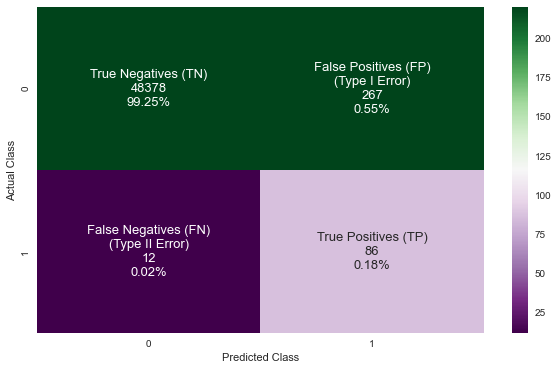

In [206]:
plt.figure(figsize=(10,6))

cf_matrix = confusion_matrix(y_test, fraud_pred_test)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='PRGn', vmax=220)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

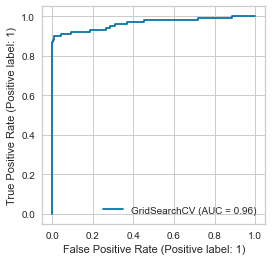

In [207]:
plot_roc_curve(grid_smote_model, X_test, y_test);

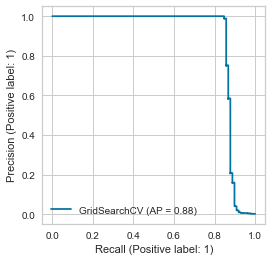

In [208]:
plot_precision_recall_curve(grid_smote_model, X_test, y_test);

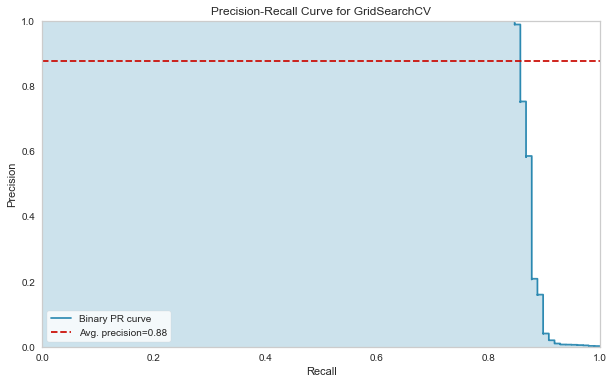

In [209]:
plt.figure(figsize=(10,6))
viz = PrecisionRecallCurve(grid_smote_model, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [210]:
# saving scores

log_smote_auc = roc_auc_score(y_test, fraud_pred_test,average=None)
log_smote_f1 = f1_score(y_test, fraud_pred_test, average=None)
log_smote_pre = precision_score(y_test, fraud_pred_test, average=None)
log_smote_recall = recall_score(y_test, fraud_pred_test, average=None)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [211]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(ds_train, ds_test, grid_smote_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 14 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_BDEG3L3W1LZ44KI9A1BX89RI8">Model Evaluation S…

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [212]:
# build model with SMOTE imbpipeline
smote_pipeline = imbpipeline(steps = [['smote', SMOTE( random_state=42)],
                                ['scaler', StandardScaler()],
                                ['randomforestclassifier', RandomForestClassifier(random_state=42)]])


rf_smote_model = smote_pipeline.fit(X_train, y_train)
rf_smote_prediction = rf_smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 243221, 1: 492})
SMOTE data distribution: Counter({1: 243221, 0: 243221})


In [213]:
eval_metric(rf_smote_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[48644     1]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48645
           1       0.99      0.85      0.91        98

    accuracy                           1.00     48743
   macro avg       0.99      0.92      0.96     48743
weighted avg       1.00      1.00      1.00     48743


Train_Set
[[243220      1]
 [  4295 238926]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    243221
           1       1.00      0.98      0.99    243221

    accuracy                           0.99    486442
   macro avg       0.99      0.99      0.99    486442
weighted avg       0.99      0.99      0.99    486442



***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [214]:
pipeline = imbpipeline(steps = [['smote', SMOTE( random_state=42)],
                                ['scaler', StandardScaler()],
                                ['randomforestclassifier', RandomForestClassifier(random_state=42)]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=42)
    
param_grid = {"randomforestclassifier__max_depth": [3,5, None],
              "randomforestclassifier__n_estimators":[3,5,10],
              "randomforestclassifier__max_features": [5,6,7,8]}

grid_smote_model = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_smote_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                       ['scaler', StandardScaler()],
                                       ['randomforestclassifier',
                                        RandomForestClassifier(random_state=42)]]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [3, 5, None],
                         'randomforestclassifier__max_features': [5, 6, 7, 8],
                         'randomforestclassifier__n_estimators': [3, 5, 10]},
             scoring='recall')

In [215]:
grid_smote_model.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_features': 5,
 'randomforestclassifier__n_estimators': 10}

In [216]:
grid_smote_model.best_score_

0.8909444985394354

In [217]:
eval_metric(grid_smote_model, X_train, y_train, X_test, y_test)

Test_Set
[[48551    94]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48645
           1       0.48      0.89      0.62        98

    accuracy                           1.00     48743
   macro avg       0.74      0.94      0.81     48743
weighted avg       1.00      1.00      1.00     48743


Train_Set
[[194221    355]
 [    33    361]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    194576
           1       0.50      0.92      0.65       394

    accuracy                           1.00    194970
   macro avg       0.75      0.96      0.82    194970
weighted avg       1.00      1.00      1.00    194970



In [218]:
fraud_pred_train = grid_smote_model.predict(X_train)
fraud_pred_test = grid_smote_model.predict(X_test)

recall_train = recall_score(y_train, fraud_pred_train)
recall_test = recall_score(y_test, fraud_pred_test)

print('Recall - Training set: ', round(recall_train,2))
print('Recall - Test set: ', round(recall_test,2))

Recall - Training set:  0.92
Recall - Test set:  0.89


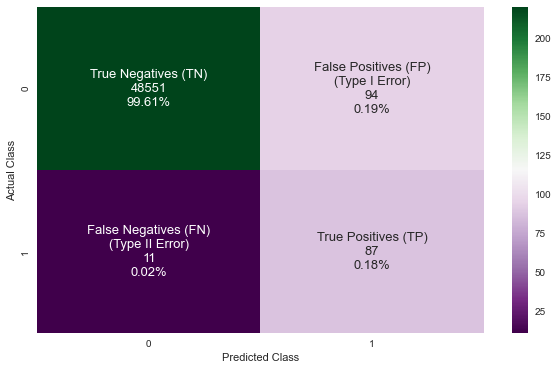

In [219]:
plt.figure(figsize=(10,6))

cf_matrix = confusion_matrix(y_test, fraud_pred_test)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='PRGn', vmax=220)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

***iii. Plot Precision and Recall Curve***


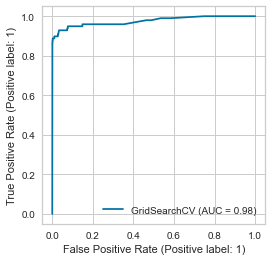

In [220]:
plot_roc_curve(grid_smote_model, X_test, y_test);

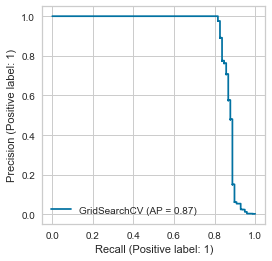

In [221]:
plot_precision_recall_curve(grid_smote_model, X_test, y_test);

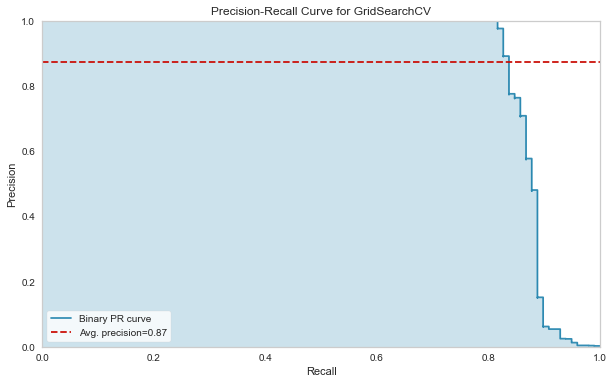

In [222]:
plt.figure(figsize=(10,6))
viz = PrecisionRecallCurve(grid_smote_model, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [223]:
# saving scores

rf_smote_auc = roc_auc_score(y_test, fraud_pred_test,average=None)
rf_smote_f1 = f1_score(y_test, fraud_pred_test, average=None)
rf_smote_pre = precision_score(y_test, fraud_pred_test, average=None)
rf_smote_recall = recall_score(y_test, fraud_pred_test, average=None)

In [224]:
# Feature İmportance with RF model
rf = RandomForestClassifier(max_depth=5, max_features = 5, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=10)

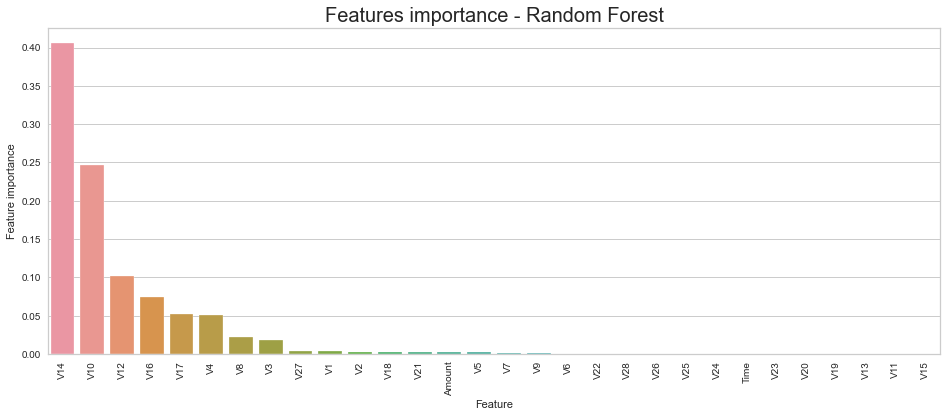

In [225]:
features = list(X_train.columns)


plt.figure(figsize = (16,6))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [226]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(ds_train, ds_test, grid_smote_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 22 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_OT3TGKPOEY51JGSRPW7YM6SUK">Model Evaluation S…

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [227]:
# build model with SMOTE imbpipeline
smote_pipeline = imbpipeline(steps = [['smote', SMOTE( random_state=42)],
                                ['scaler', StandardScaler()],
                                ['XGBClassifier', XGBClassifier(random_state=42)]])


xgb_smote_model = smote_pipeline.fit(X_train, y_train)
xgb_smote_prediction = xgb_smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 243221, 1: 492})
SMOTE data distribution: Counter({1: 243221, 0: 243221})


In [228]:
eval_metric(xgb_smote_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[48644     1]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48645
           1       0.99      0.86      0.92        98

    accuracy                           1.00     48743
   macro avg       0.99      0.93      0.96     48743
weighted avg       1.00      1.00      1.00     48743


Train_Set
[[243220      1]
 [  3564 239657]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    243221
           1       1.00      0.99      0.99    243221

    accuracy                           0.99    486442
   macro avg       0.99      0.99      0.99    486442
weighted avg       0.99      0.99      0.99    486442



***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [229]:
def xgboost_search(X, y, search_verbose=1):
    params = {
    "gamma":[0.5, 1, 1.5, 2, 5],
    "max_depth":[3,4,5,6],
    "min_child_weight": [100],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "learning_rate": [0.1, 0.01, 0.001]
    }
    xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False, random_state=42)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="recall", n_jobs=1, cv=skf, verbose=search_verbose)

    grid_search.fit(X, y)

    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)

    return grid_search.best_params_

In [230]:
import random
rows = random.sample(np.arange(0,len(X_smote.index)).tolist(), 5000)

In [231]:
xgboost_search(X_smote.iloc[rows,], y_smote.iloc[rows,])

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best estimator: 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=100, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
Parameters:  {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 100, 'subsample': 1.0}
Highest AUC: 0.95


{'colsample_bytree': 0.8,
 'gamma': 5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 100,
 'subsample': 1.0}

In [243]:
pipeline = imbpipeline(steps = [['smote', SMOTE( random_state=42)],
                                ['scaler', StandardScaler()],
                                ['XGBClassifier', XGBClassifier(random_state=42)]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=42)
    
param_grid = {'XGBClassifier__max_depth':[3], "XGBClassifier__learning_rate": [0.1],
             "XGBClassifier__subsample":[1.0], "XGBClassifier__colsample_bytree":[0.8], 
              "XGBClassifier__gamma":[5], "XGBClassifier__min_child_weight":[100]}

grid_smote_model = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1,
                               verbose=1)

grid_smote_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                       ['scaler', StandardScaler()],
                                       ['XGBClassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=Fa...
                                                      monotone_constraints=None,
                                         

In [244]:
grid_smote_model.best_params_

{'XGBClassifier__colsample_bytree': 0.8,
 'XGBClassifier__gamma': 5,
 'XGBClassifier__learning_rate': 0.1,
 'XGBClassifier__max_depth': 3,
 'XGBClassifier__min_child_weight': 100,
 'XGBClassifier__subsample': 1.0}

In [245]:
grid_smote_model.best_score_

0.8985394352482962

In [246]:
eval_metric(grid_smote_model, X_train, y_train, X_test, y_test)

Test_Set
[[48490   155]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48645
           1       0.36      0.89      0.51        98

    accuracy                           1.00     48743
   macro avg       0.68      0.94      0.76     48743
weighted avg       1.00      1.00      1.00     48743


Train_Set
[[193978    598]
 [    19    375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    194576
           1       0.39      0.95      0.55       394

    accuracy                           1.00    194970
   macro avg       0.69      0.97      0.77    194970
weighted avg       1.00      1.00      1.00    194970



In [247]:
fraud_pred_train = grid_smote_model.predict(X_train)
fraud_pred_test = grid_smote_model.predict(X_test)

recall_train = recall_score(y_train, fraud_pred_train)
recall_test = recall_score(y_test, fraud_pred_test)

print('Recall - Training set: ', round(recall_train,2))
print('Recall - Test set: ', round(recall_test,2))

Recall - Training set:  0.95
Recall - Test set:  0.89


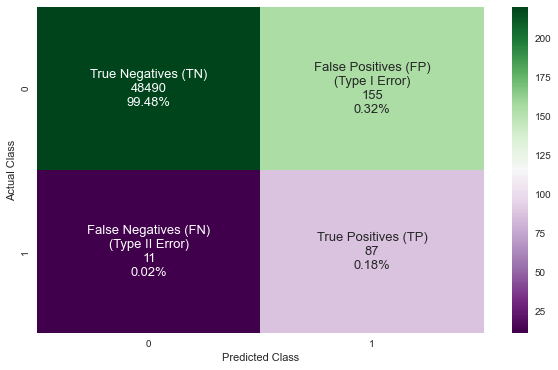

In [248]:
plt.figure(figsize=(10,6))

cf_matrix = confusion_matrix(y_test, fraud_pred_test)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='PRGn', vmax=220)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

***iii. Plot Precision and Recall Curve***


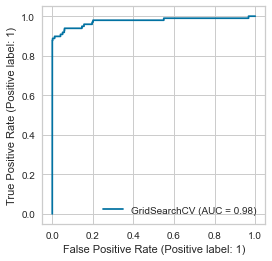

In [249]:
plot_roc_curve(grid_smote_model, X_test, y_test);

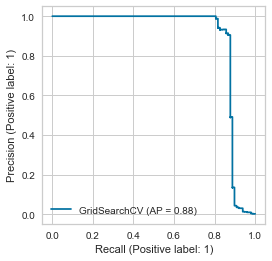

In [250]:
plot_precision_recall_curve(grid_smote_model, X_test, y_test);

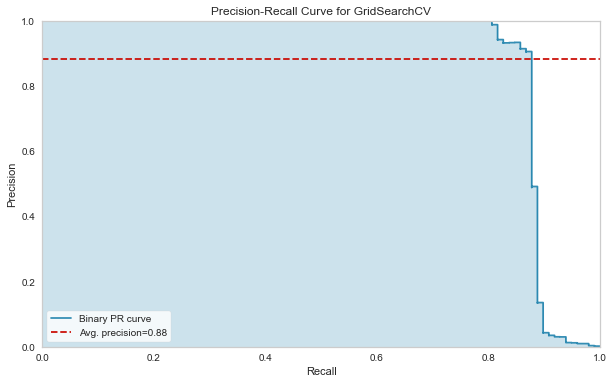

In [251]:
plt.figure(figsize=(10,6))
viz = PrecisionRecallCurve(grid_smote_model, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [252]:
# saving scores

xgb_smote_auc = roc_auc_score(y_test, fraud_pred_test,average=None)
xgb_smote_f1 = f1_score(y_test, fraud_pred_test, average=None)
xgb_smote_pre = precision_score(y_test, fraud_pred_test, average=None)
xgb_smote_recall = recall_score(y_test, fraud_pred_test, average=None)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [253]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(ds_train, ds_test, grid_smote_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 23 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_YCTOF3LZE7137UBHAF3UR7I0Y">Model Evaluation S…

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***ii. Define Model***

In [73]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [74]:
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, stratify=y_smote , test_size=0.3, random_state=42)

In [76]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
seed = 42

In [78]:
tf.random.set_seed(seed)

ann_model = Sequential()

ann_model.add(Dense(1024, activation = "relu", input_dim = X_train.shape[1]))
ann_model.add(Dropout(0.4))

ann_model.add(Dense(512, activation = "relu"))
ann_model.add(Dropout(0.4))

ann_model.add(Dense(256, activation = "relu"))
ann_model.add(Dropout(0.3))

ann_model.add(Dense(128, activation = "relu"))
ann_model.add(Dropout(0.3))

ann_model.add(Dense(64, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(32, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(16, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(8, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(4, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(1, activation = "sigmoid"))

***iii. Compile Model***

In [79]:
optimizer = Adam(learning_rate=0.005)

In [80]:
ann_model.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=["Recall"])

In [81]:
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1024)              31744     
                                                                 
 dropout_36 (Dropout)        (None, 1024)              0         
                                                                 
 dense_41 (Dense)            (None, 512)               524800    
                                                                 
 dropout_37 (Dropout)        (None, 512)               0         
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dropout_38 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 128)              

In [82]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 3, restore_best_weights=True)

***iv. Fit Model***

In [83]:
ann_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks = [early_stop])

Epoch 1/10
2661/2661 [==============================] - 57s 21ms/step - loss: 0.0932 - recall: 0.9323 - val_loss: 0.0253 - val_recall: 0.9933
Epoch 2/10
2661/2661 [==============================] - 53s 20ms/step - loss: 0.0711 - recall: 0.9510 - val_loss: 0.0250 - val_recall: 0.9890
Epoch 3/10
2661/2661 [==============================] - 54s 20ms/step - loss: 0.0770 - recall: 0.9617 - val_loss: 0.0352 - val_recall: 0.9710
Epoch 4/10
2661/2661 [==============================] - 54s 20ms/step - loss: 0.1041 - recall: 0.9660 - val_loss: 0.0169 - val_recall: 0.9945
Epoch 5/10
2661/2661 [==============================] - 53s 20ms/step - loss: 0.0839 - recall: 0.9809 - val_loss: 0.0114 - val_recall: 0.9986
Epoch 6/10
2661/2661 [==============================] - 53s 20ms/step - loss: 0.0933 - recall: 0.9533 - val_loss: 0.0227 - val_recall: 0.9908
Epoch 7/10
2661/2661 [==============================] - 53s 20ms/step - loss: 0.1512 - recall: 0.9600 - val_loss: 0.0661 - val_recall: 0.9885
Epoch 

***v. Prediction and Model Evaluating***

In [84]:
loss_df = pd.DataFrame(ann_model.history.history)
loss_df.head()

loss    recall  val_loss  val_recall
0  0.093155  0.932284  0.025330    0.993339
1  0.071141  0.950991  0.024953    0.989022
2  0.076984  0.961658  0.035223    0.970959
3  0.104111  0.966033  0.016872    0.994477
4  0.083866  0.980893  0.011411    0.998630

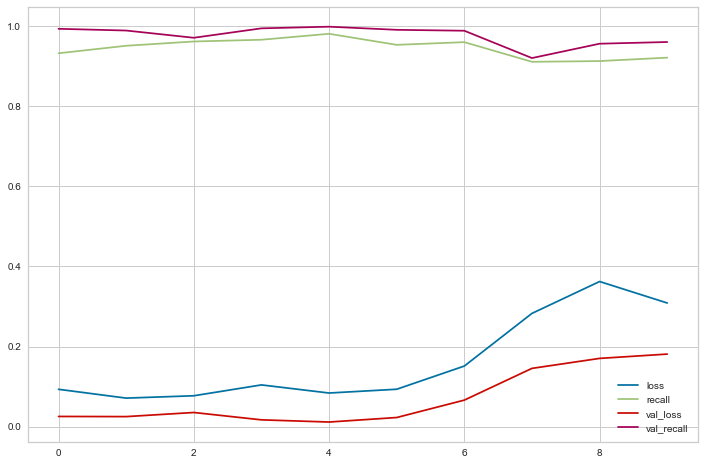

In [85]:
loss_df.plot();

In [86]:
ann_model.evaluate(X_test, y_test, verbose=0)

[0.011410531587898731, 0.9986295104026794]

In [87]:
y_pred = ann_model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

4561/4561 [==============================] - 14s 3ms/step
[[72505   462]
 [  100 72866]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     72967
           1       0.99      1.00      1.00     72966

    accuracy                           1.00    145933
   macro avg       1.00      1.00      1.00    145933
weighted avg       1.00      1.00      1.00    145933



In [88]:
y_train_pred = ann_model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

10641/10641 [==============================] - 40s 4ms/step
[[169279    975]
 [   234 170021]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    170254
           1       0.99      1.00      1.00    170255

    accuracy                           1.00    340509
   macro avg       1.00      1.00      1.00    340509
weighted avg       1.00      1.00      1.00    340509



***vi. Plot Precision and Recall Curve***

4561/4561 [==============================] - 25s 5ms/step


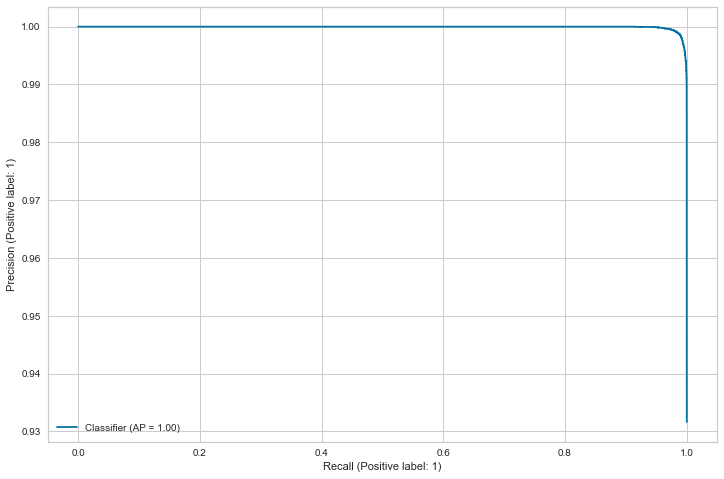

In [89]:
y_pred_proba = ann_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [90]:
average_precision_score(y_test, y_pred_proba)

0.9999352833025605

In [91]:
# saving ANN scores

ann_auc = roc_auc_score(y_test, y_pred,average=None)
ann_f1 = f1_score(y_test, y_pred, average=None)
ann_pre = precision_score(y_test, y_pred, average=None)
ann_recall = recall_score(y_test, y_pred, average=None)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [92]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(ds_train, ds_test, ann_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

1524/1524 [==============================] - 8s 5ms/step


1/1 [==============================] - 0s 19ms/step


deepchecks - WARNING - Could not find model's classes, using the observed classes


1524/1524 [==============================] - 6s 4ms/step


deepchecks - WARNING - Could not find model's classes, using the observed classes
deepchecks - WARNING - Could not find model's classes, using the observed classes


313/313 [==============================] - 1s 4ms/step


deepchecks - WARNING - Could not find model's classes, using the observed classes


1/1 [==============================] - 0s 6ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


313/313 [==============================] - 1s 4ms/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 1309 seconds, but timeout was configured to 120 seconds
deepchecks - WARNING - Could not find model's classes, using the observed classes


32/32 [==============================] - 0s 5ms/step


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_7DR5L49G0JDQ4ZJOV9I4RINHQ">Model Evaluation S…

### Models Comparing

In [254]:
compare = pd.DataFrame({"Model": ["Logistic Regression with Smote", "Random Forest with Smote", "XGBoost with Smote", "ANN with Smote"],
                        
                        "F1_Score": [log_smote_f1[1], rf_smote_f1[1], xgb_smote_f1[1], ann_f1[1]],
                        
                        "Recall_Score": [log_smote_recall[1], rf_smote_recall[1], xgb_smote_recall[1], ann_recall[1]],
                        
                        "Precision_Score": [log_smote_pre[1], rf_smote_pre[1], xgb_smote_pre[1], ann_pre[1]],
                       
                        "ROC_AUC_Score": [log_smote_auc, rf_smote_auc, xgb_smote_auc, ann_auc]})

In [255]:
compare

Model  F1_Score  Recall_Score  Precision_Score  \
0  Logistic Regression with Smote  0.381375      0.877551         0.243626   
1        Random Forest with Smote  0.623656      0.887755         0.480663   
2              XGBoost with Smote  0.511765      0.887755         0.359504   
3                  ANN with Smote  0.996158      0.998629         0.993700   

   ROC_AUC_Score  
0       0.936031  
1       0.942911  
2       0.942284  
3       0.996149

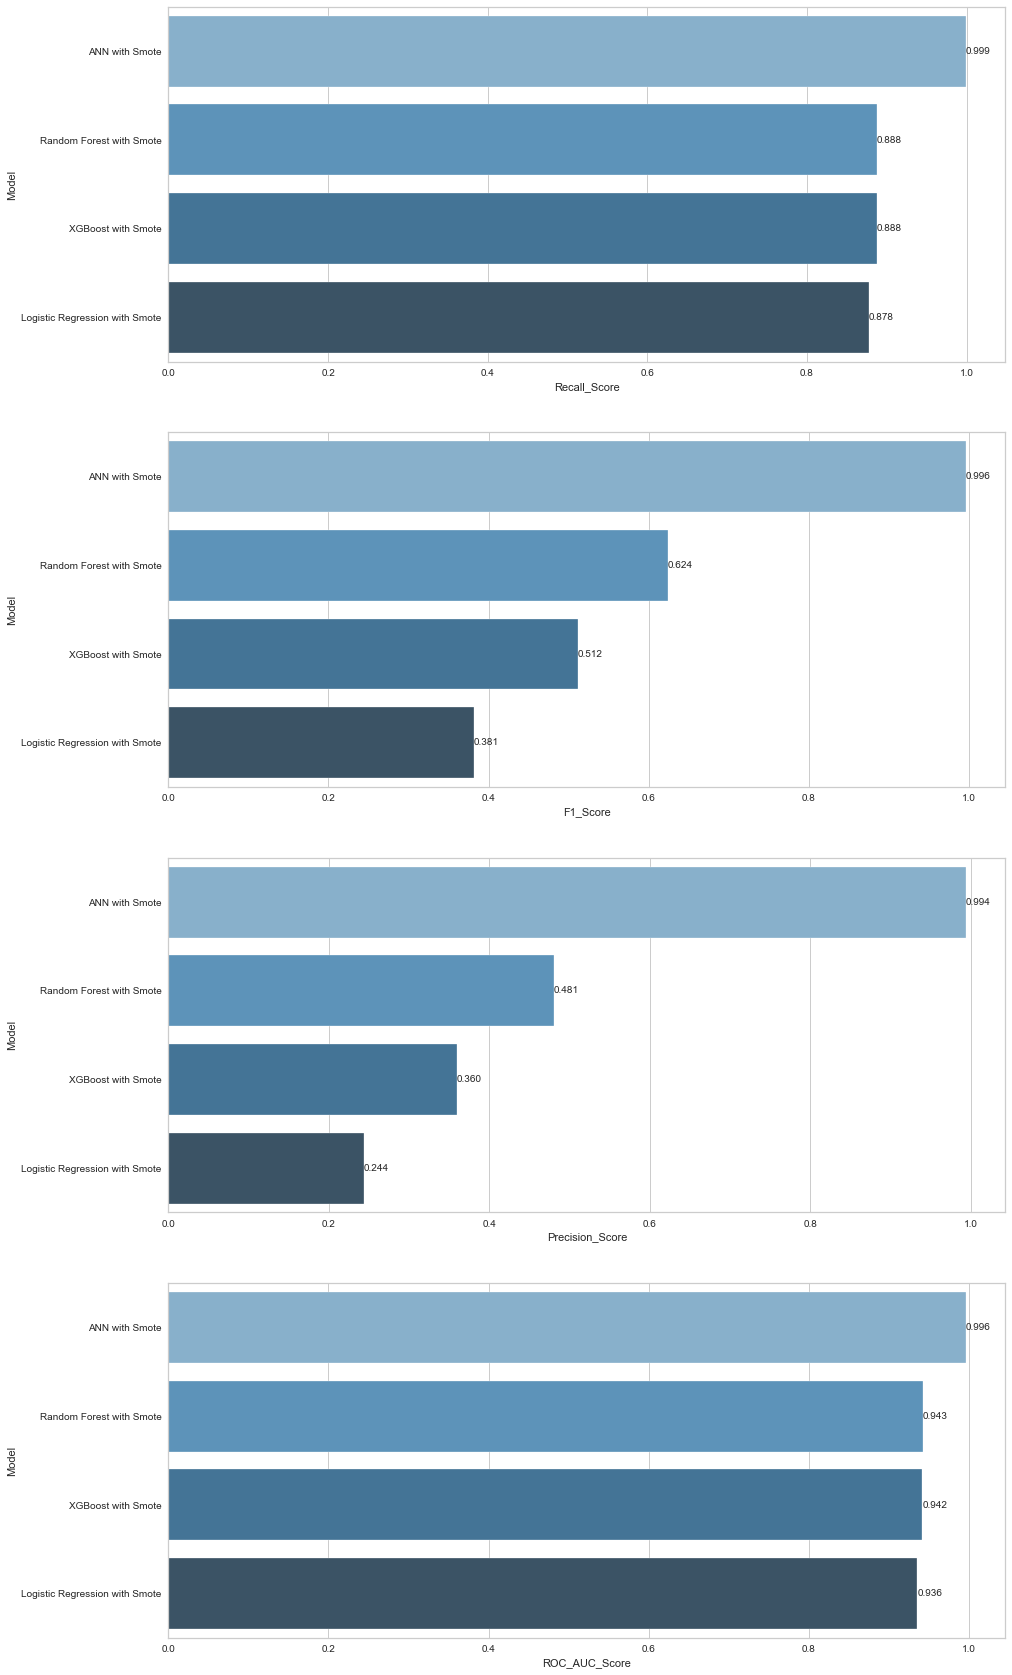

In [256]:
plt.figure(figsize=(15,30))

plt.subplot(411)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(412)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(413)
compare = compare.sort_values(by="Precision_Score", ascending=False)
ax=sns.barplot(x="Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [257]:
ann_model.save('ann_model.h5') #best model

In [260]:
pickle.dump(scaler, open("scaler_variables", 'wb'))

#### Prediction

In [261]:
final_model = load_model('ann_model.h5')
scaler_ann = pickle.load(open("scaler_variables", "rb"))

In [277]:
pre_df = df.drop('Class', axis = 1).iloc[0:10, :]
pre_df

Time        V1        V2        V3        V4        V5        V6  \
0   406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1   472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
5  7526.0  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   
6  7535.0  0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479   
7  7543.0  0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168   
8  7551.0  0.316459  3.809076 -5.615159  6.047445  1.554026 -2.651353   
9  7610.0  0.725646  2.300894 -5.329976  4.007683 -1.730411 -1.732193   

         V7        V8        V9       V10       V11        V12       V13  \
0 -2.537387  1.391657 -2.770089 -2.772272  3.202033  -2.899907 -0.595222   
1  0.325574 -0.067794 -0.270953 -0.838587 -0.414575  -0.503141  0.676502   
2  0.562320 -0.399147 -0.238253 -1.525412  2.032912  -6.560124  0.022937   
3 -3.496197 -0.248778 -0.247768 -4.801637  4.895844 -10.912819  0.184372   
4  1.713445 -0.496358 -1.282858 -2.447469  2.101344  -4.609628  1.464378   
5 -1.631735  0.154612 -2.795892 -6.187891  5.664395  -9.854485 -0.306167   
6 -1.689102  0.303253 -3.139409 -6.045468  6.754625  -8.948179  0.702725   
7 -0.812891  0.133080 -2.214311 -5.134454  4.560720  -8.873748 -0.797484   
8 -0.746579  0.055586 -2.678679 -4.959493  6.439053  -7.520117  0.386352   
9 -3.968593  1.063728 -0.486097 -4.624985  5.588724  -7.148243  1.680451   

         V14       V15       V16        V17       V18       V19       V20  \
0  -4.289254  0.389724 -1.140747  -2.830056 -0.016822  0.416956  0.126911   
1  -1.692029  2.000635  0.666780   0.599717  1.725321  0.283345  2.102339   
2  -1.470102 -0.698826 -2.282194  -4.781831 -2.615665 -1.334441 -0.430022   
3  -6.771097 -0.007326 -7.358083 -12.598419 -5.131549  0.308334 -0.171608   
4  -6.079337 -0.339237  2.581851   6.739384  3.042493 -2.721853  0.009061   
5 -10.691196 -0.638498 -2.041974  -1.129056  0.116453 -1.934666  0.488378   
6 -10.733854 -1.379520 -1.638960  -1.746350  0.776744 -1.327357  0.587743   
7  -9.177166 -0.257025 -0.871688   1.313014  0.773914 -2.370599  0.269773   
8  -9.252307 -1.365188 -0.502362   0.784427  1.494305 -1.808012  0.388307   
9  -6.210258  0.495282 -3.599540  -4.830324 -0.649090  2.250123  0.504646   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.517232 -0.035049 -0.465211  0.320198  0.044519  0.177840  0.261145   
1  0.661696  0.435477  1.375966 -0.293803  0.279798 -0.145362 -0.252773   
2 -0.294166 -0.932391  0.172726 -0.087330 -0.156114 -0.542628  0.039566   
3  0.573574  0.176968 -0.436207 -0.053502  0.252405 -0.657488 -0.827136   
4 -0.379068 -0.704181 -0.656805 -1.632653  1.488901  0.566797 -0.010016   
5  0.364514 -0.608057 -0.539528  0.128940  1.488481  0.507963  0.735822   
6  0.370509 -0.576752 -0.669605 -0.759908  1.605056  0.540675  0.737040   
7  0.156617 -0.652450 -0.551572 -0.716522  1.415717  0.555265  0.530507   
8  0.208828 -0.511747 -0.583813 -0.219845  1.474753  0.491192  0.518868   
9  0.589669  0.109541  0.601045 -0.364700 -1.843078  0.351909  0.594550   

        V28  Amount  
0 -0.143276    0.00  
1  0.035764  529.00  
2 -0.153029  239.93  
3  0.849573   59.00  
4  0.146793    1.00  
5  0.513574    1.00  
6  0.496699    1.00  
7  0.404474    1.00  
8  0.402528    1.00  
9  0.099372    1.00

In [278]:
pre_df = scaler_ann.transform(pre_df)
pre_df

array([[-2.28102748e+00, -1.55642301e+00,  1.20893415e+00,
        -1.25715055e+00,  5.63319804e+00, -5.73358119e-01,
        -1.26830968e+00, -2.40659518e+00,  1.69803606e+00,
        -2.43675849e+00, -3.75643618e+00,  3.31785468e+00,
        -2.25155599e+00, -7.22533126e-01, -5.23061532e+00,
         1.02330010e+00, -1.40543844e+00, -5.31864175e+00,
        -9.97182808e-02,  8.47470882e-01,  1.99064657e-01,
         1.57564455e+00, -7.34513285e-02, -1.26148218e+00,
         8.43571757e-01,  2.55913928e-01,  3.04092518e-01,
         1.58359565e+00, -1.72720530e-01, -3.89867204e-01],
       [-2.27937709e+00, -2.10746049e+00, -2.62674768e+00,
         1.02819641e+00,  3.54602689e+00,  7.63412306e-01,
        -1.01742448e+00,  4.10614299e-01,  2.32732085e-01,
        -4.88235466e-01, -8.98697160e-01, -1.04189873e-01,
         9.97801818e-02,  3.29165507e-01, -2.46956759e+00,
         3.26223455e+00,  1.52790077e+00,  1.20632175e+00,
         1.60802928e+00,  6.19749379e-01,  6.38060431e+

In [279]:
(final_model.predict(pre_df) > 0.5).astype("int32")

1/1 [==============================] - 0s 34ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [280]:
df["Class"].iloc[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Class, dtype: int64

### Save and Export Variables

In [258]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0   406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1   472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

         V7        V8        V9       V10       V11        V12       V13  \
0 -2.537387  1.391657 -2.770089 -2.772272  3.202033  -2.899907 -0.595222   
1  0.325574 -0.067794 -0.270953 -0.838587 -0.414575  -0.503141  0.676502   
2  0.562320 -0.399147 -0.238253 -1.525412  2.032912  -6.560124  0.022937   
3 -3.496197 -0.248778 -0.247768 -4.801637  4.895844 -10.912819  0.184372   
4  1.713445 -0.496358 -1.282858 -2.447469  2.101344  -4.609628  1.464378   

        V14       V15       V16        V17       V18       V19       V20  \
0 -4.289254  0.389724 -1.140747  -2.830056 -0.016822  0.416956  0.126911   
1 -1.692029  2.000635  0.666780   0.599717  1.725321  0.283345  2.102339   
2 -1.470102 -0.698826 -2.282194  -4.781831 -2.615665 -1.334441 -0.430022   
3 -6.771097 -0.007326 -7.358083 -12.598419 -5.131549  0.308334 -0.171608   
4 -6.079337 -0.339237  2.581851   6.739384  3.042493 -2.721853  0.009061   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.517232 -0.035049 -0.465211  0.320198  0.044519  0.177840  0.261145   
1  0.661696  0.435477  1.375966 -0.293803  0.279798 -0.145362 -0.252773   
2 -0.294166 -0.932391  0.172726 -0.087330 -0.156114 -0.542628  0.039566   
3  0.573574  0.176968 -0.436207 -0.053502  0.252405 -0.657488 -0.827136   
4 -0.379068 -0.704181 -0.656805 -1.632653  1.488901  0.566797 -0.010016   

        V28  Amount  Class  
0 -0.143276    0.00      1  
1  0.035764  529.00      1  
2 -0.153029  239.93      1  
3  0.849573   59.00      1  
4  0.146793    1.00      1

In [259]:
df.to_csv('Credit_Card_Fraud_final_df.csv')

___

<p style="text-align: center;"><img src="https://camo.githubusercontent.com/37c5dfc561cbb402706d503622713e864582845187fa9f97800f5751320671b3/68747470733a2f2f65787465726e616c2d636f6e74656e742e6475636b6475636b676f2e636f6d2f69752f3f753d687474707325334125324625324661692d6a6f75726e65792e636f6d25324677702d636f6e74656e7425324675706c6f61647325324632303139253246303625324666726175642d454d562d636869702d6372656469742d636172642e6a706726663d31266e6f66623d31" class="img-fluid" alt="CLRSWY"></p>

___